In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.style as style
import missingno as msno

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/ncei-heathrow-2010-2019/NCEI Heathrow Meteo Data 2010-2019.csv', 
                               usecols=['DATE', 'PRCP', 'TAVG'], parse_dates=['DATE'])
#df['DATE'] = df['DATE'].astype('datetime64[ns]') # needed if date format is not standard
df.columns = ['date', 'precipitation', 'avg_temp']
df.sample(3)

date  precipitation  avg_temp
2123 2015-11-15            7.1      15.0
268  2010-09-26            0.0      10.4
2300 2016-05-10            2.5      15.9

In [3]:
df.dtypes

date             datetime64[ns]
precipitation           float64
avg_temp                float64
dtype: object

In [4]:
len(df)

3621

In [5]:
df.isnull().sum()

date              0
precipitation    30
avg_temp          0
dtype: int64

In [6]:
round(df.isnull().mean() * 100, 2)

date             0.00
precipitation    0.83
avg_temp         0.00
dtype: float64

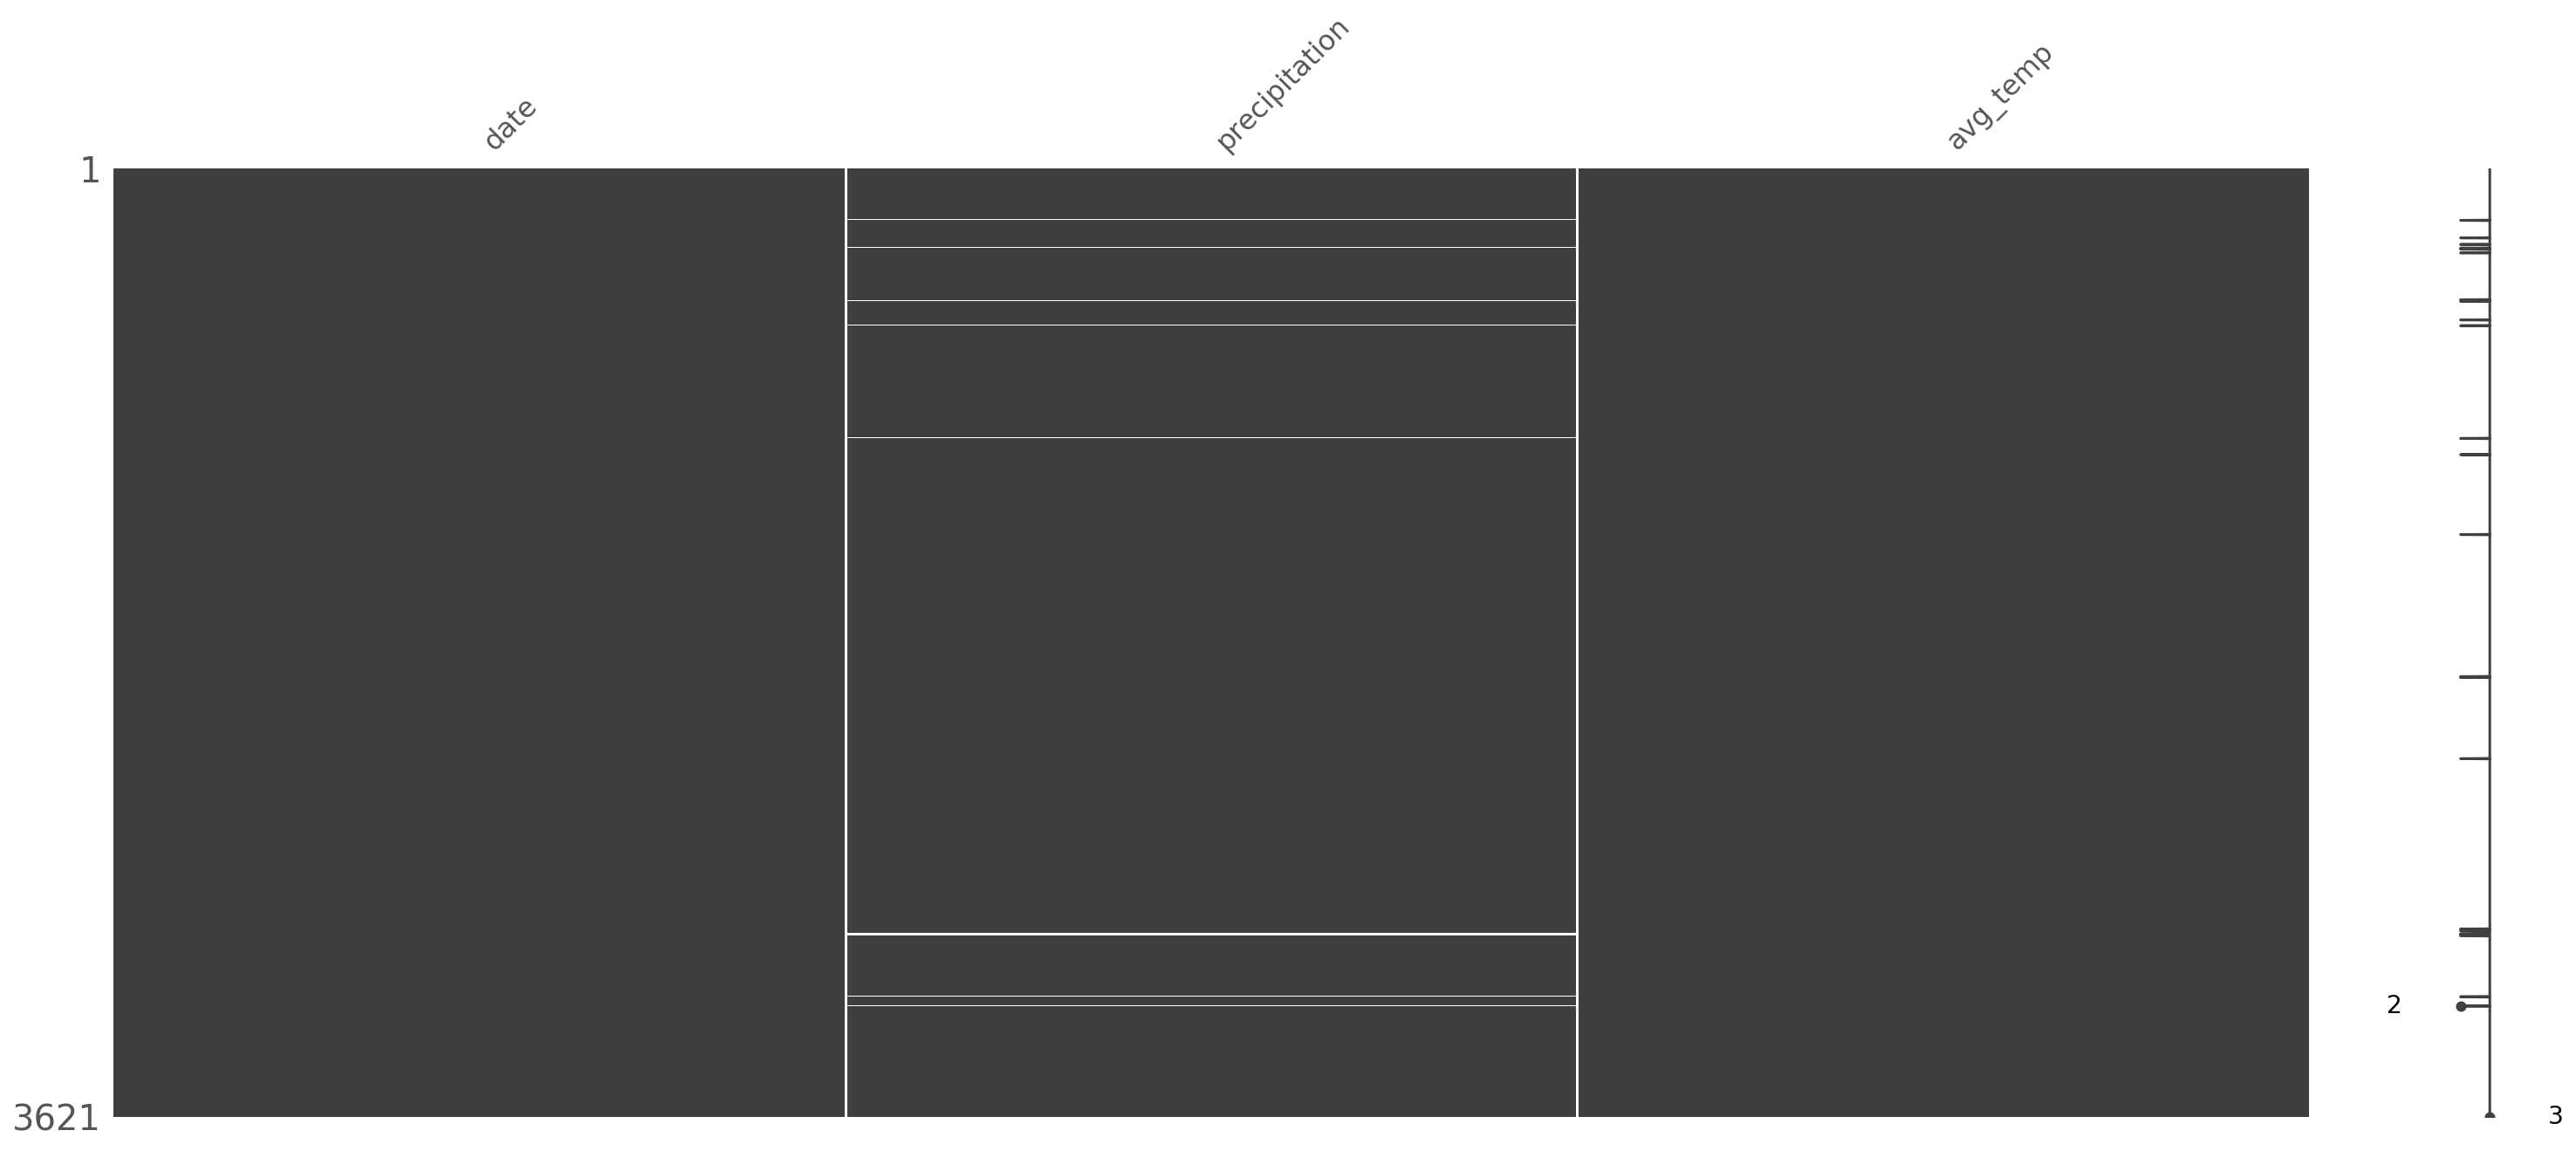

In [7]:
_ = msno.matrix(df)

In [8]:
df['precipitation'].fillna(0, inplace=True)

In [9]:
print(f"Data Available from {df.date.min()} to {df.date.max()}")

Data Available from 2010-01-01 00:00:00 to 2019-12-31 00:00:00


In [10]:
idx = pd.date_range(df.date.min(), df.date.max())
print(f"Days present {len(df)} out of {len(idx)}")

Days present 3621 out of 3652


In [11]:
pd.DataFrame(data=idx.difference(df.date), columns=['dates']).sample(3)

dates
0  2015-04-08
14 2015-04-22
16 2015-04-24

In [12]:
MIN_PRECIPITATION_MM_DRY = 1.0

In [13]:
round((len(df[df['precipitation'] < MIN_PRECIPITATION_MM_DRY]) / len(df)) * 100, 2)

70.81

In [14]:
df[df.precipitation == df.precipitation.max()][['date', 'precipitation']]

date  precipitation
2043 2015-08-27           48.0

In [15]:
df[df.avg_temp == df.avg_temp.max()][['date', 'avg_temp']]

date  avg_temp
3461 2019-07-25      28.6

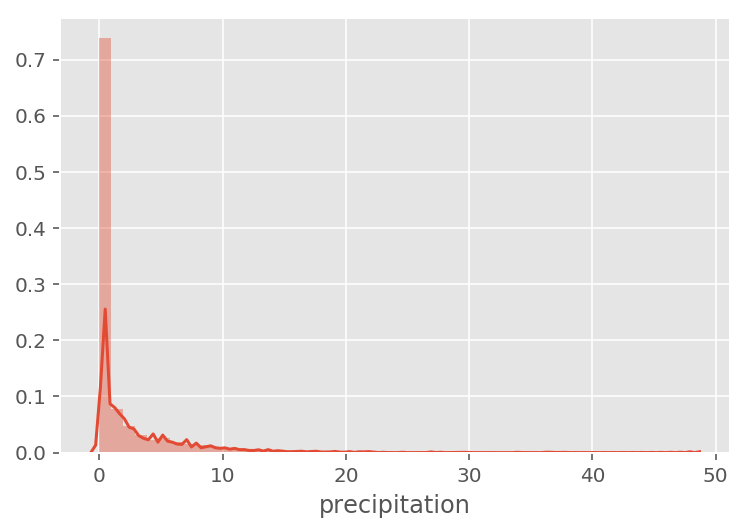

In [16]:
sns.distplot(df.precipitation)

In [17]:
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['day'] = df.date.dt.day
df['weekdayName'] = df.date.dt.weekday_name
df['weekday'] = df.date.dt.weekday
df['week'] = df.date.dt.week
df['weekend'] = df.date.dt.weekday // 5 == 1

In [18]:
df['raining'] = df['precipitation'].gt(MIN_PRECIPITATION_MM_DRY).astype('int')

In [19]:
df.sample(3)

date  precipitation  avg_temp  month  year  day weekdayName  \
2220 2016-02-20            0.3      10.8      2  2016   20    Saturday   
2044 2015-08-28            3.8      16.1      8  2015   28      Friday   
3479 2019-08-12            0.0      15.6      8  2019   12      Monday   

      weekday  week  weekend  raining  
2220        5     7     True        0  
2044        4    35    False        1  
3479        0    33    False        0

In [20]:
all_month_year_df = pd.pivot_table(df, values="precipitation",index=["month"],
                                   columns=["year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

year      2010      2011      2012      2013      2014      2015      2016  \
Jan   1.687097  2.506452  0.996774  1.309677  4.783871  1.964516  2.383871   
Feb   3.196429  1.535714  0.579310  1.389286  3.671429  1.457143  1.572414   
Mar   1.641935  0.464516  0.561290  1.554839  1.041935  0.835484  2.367742   
Apr   0.726667  0.086667  2.926667  1.130000  1.880000  0.922222  1.593333   
May   0.764516  0.806452  0.835484  1.332258  2.841935  0.819355  1.567742   
Jun   0.250000  2.643333  3.390000  0.400000  1.356667  0.423333  3.513333   
Jul   0.548387  1.561290  1.835484  0.819355  1.622581  2.325806  0.541935   
Aug   3.019355  2.154839  1.141935  1.067742  3.174194  3.412903  0.700000   
Sep   1.033333  1.160000  1.230000  1.676667  0.360000  2.056667  1.316667   
Oct   2.000000  0.409677  2.454839  1.596774  2.480645  1.296774  0.800000   
Nov   0.830000  0.896667  2.180000  1.676667  4.270000  1.573333  2.900000   
Dec   0.629032  1.829032  2.709677  2.993548  1.235484  1.258065  0.341935   
All   1.352603  1.337808  1.735519  1.414521  2.387397  1.569767  1.625956   

year      2017      2018      2019       All  
Jan   1.867742  1.329032  0.929032  1.975806  
Feb   1.450000  0.989286  1.346429  1.714184  
Mar   0.887097  2.680645  1.654839  1.369032  
Apr   0.123333  2.156667  0.426667  1.217921  
May   2.151613  1.964516  1.337037  1.443464  
Jun   1.546667  0.016667  2.736667  1.627667  
Jul   2.932258  0.483871  1.632258  1.430323  
Aug   1.858065  1.538710  1.100000  1.916774  
Sep   1.946667  0.563333  1.856667  1.320000  
Oct   0.448387  1.845161  3.125806  1.645806  
Nov   1.160000  2.575000  2.616667  2.057483  
Dec   2.477419  1.890323  2.912903  1.827742  
All   1.575890  1.491086  1.814127  1.630875

In [21]:
def plot_heatmap(df, title):
    plt.figure(figsize = (14, 10))
    ax = sns.heatmap(df, cmap='RdYlGn_r',
                     robust=True,
                     fmt='.2f', annot=True,
                     linewidths=.5, annot_kws={'size':11},
                     cbar_kws={'shrink':.8, 'label':'Precipitation (mm)'})
    
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    plt.title(title, fontdict={'fontsize':18}, pad=14);

robust or vmin, vmax

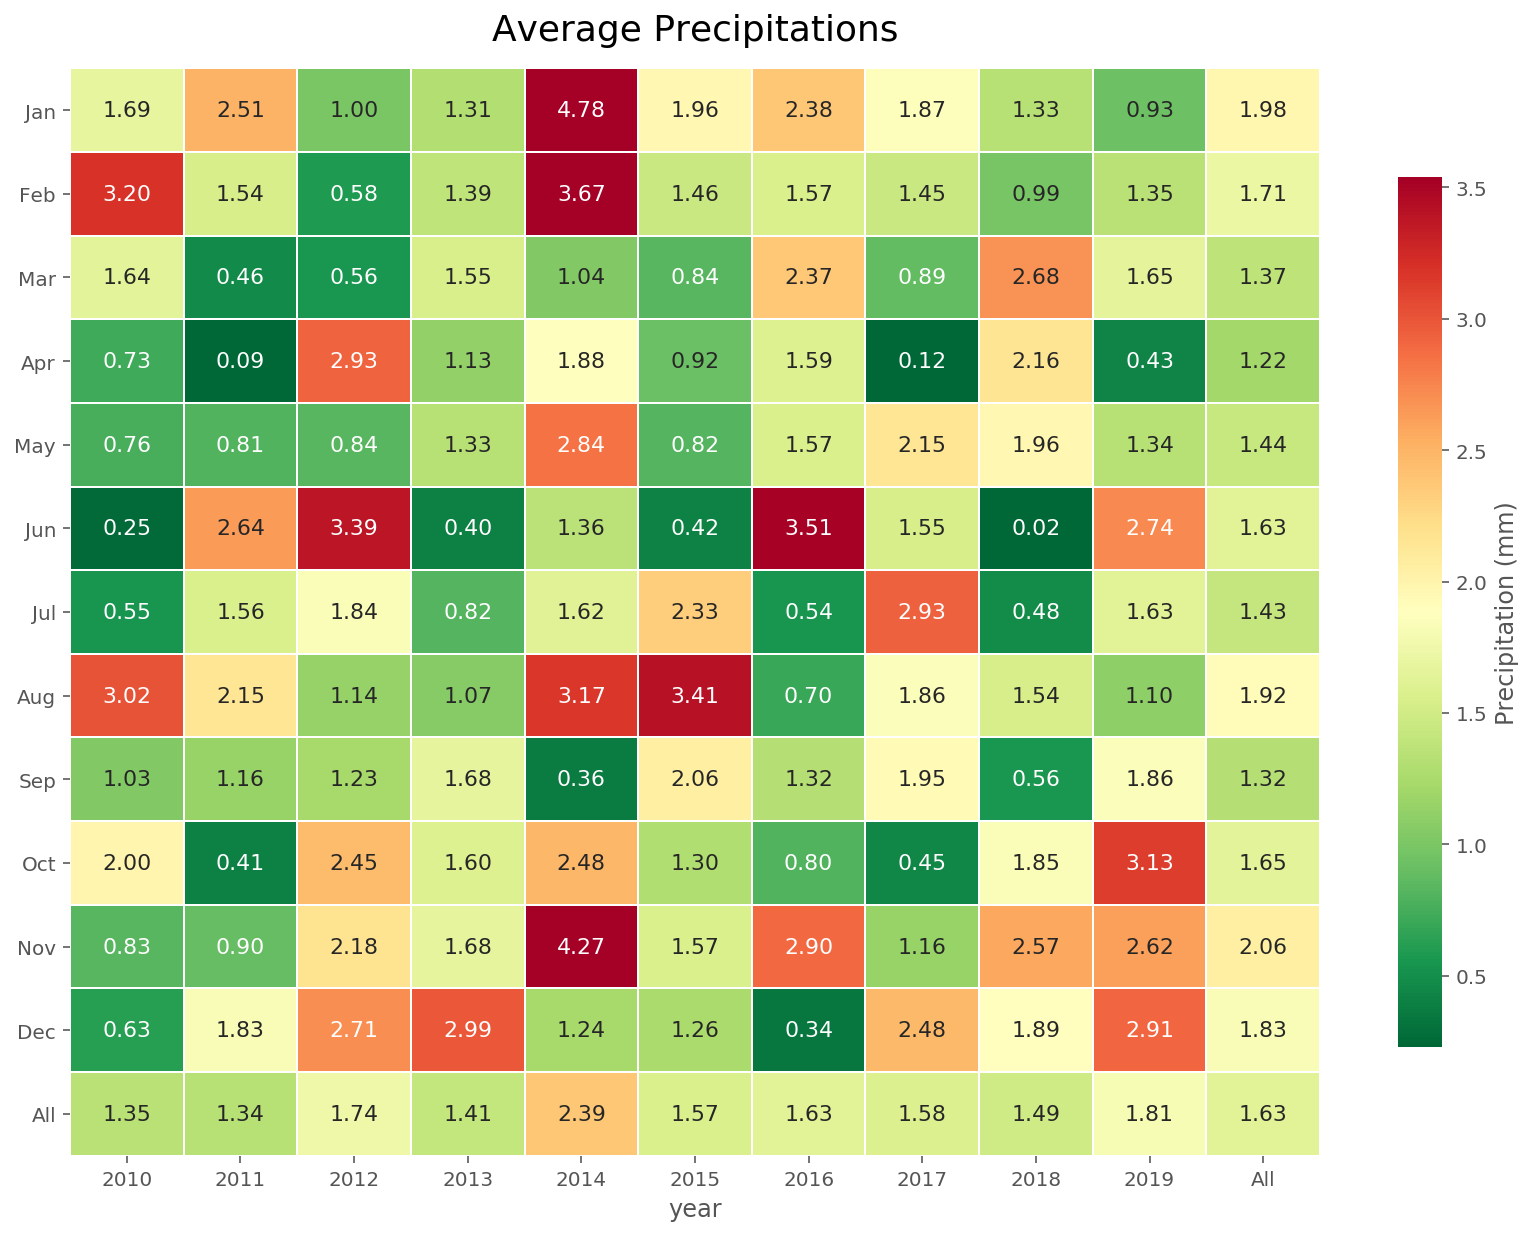

In [22]:
plot_heatmap(all_month_year_df, 'Average Precipitations')

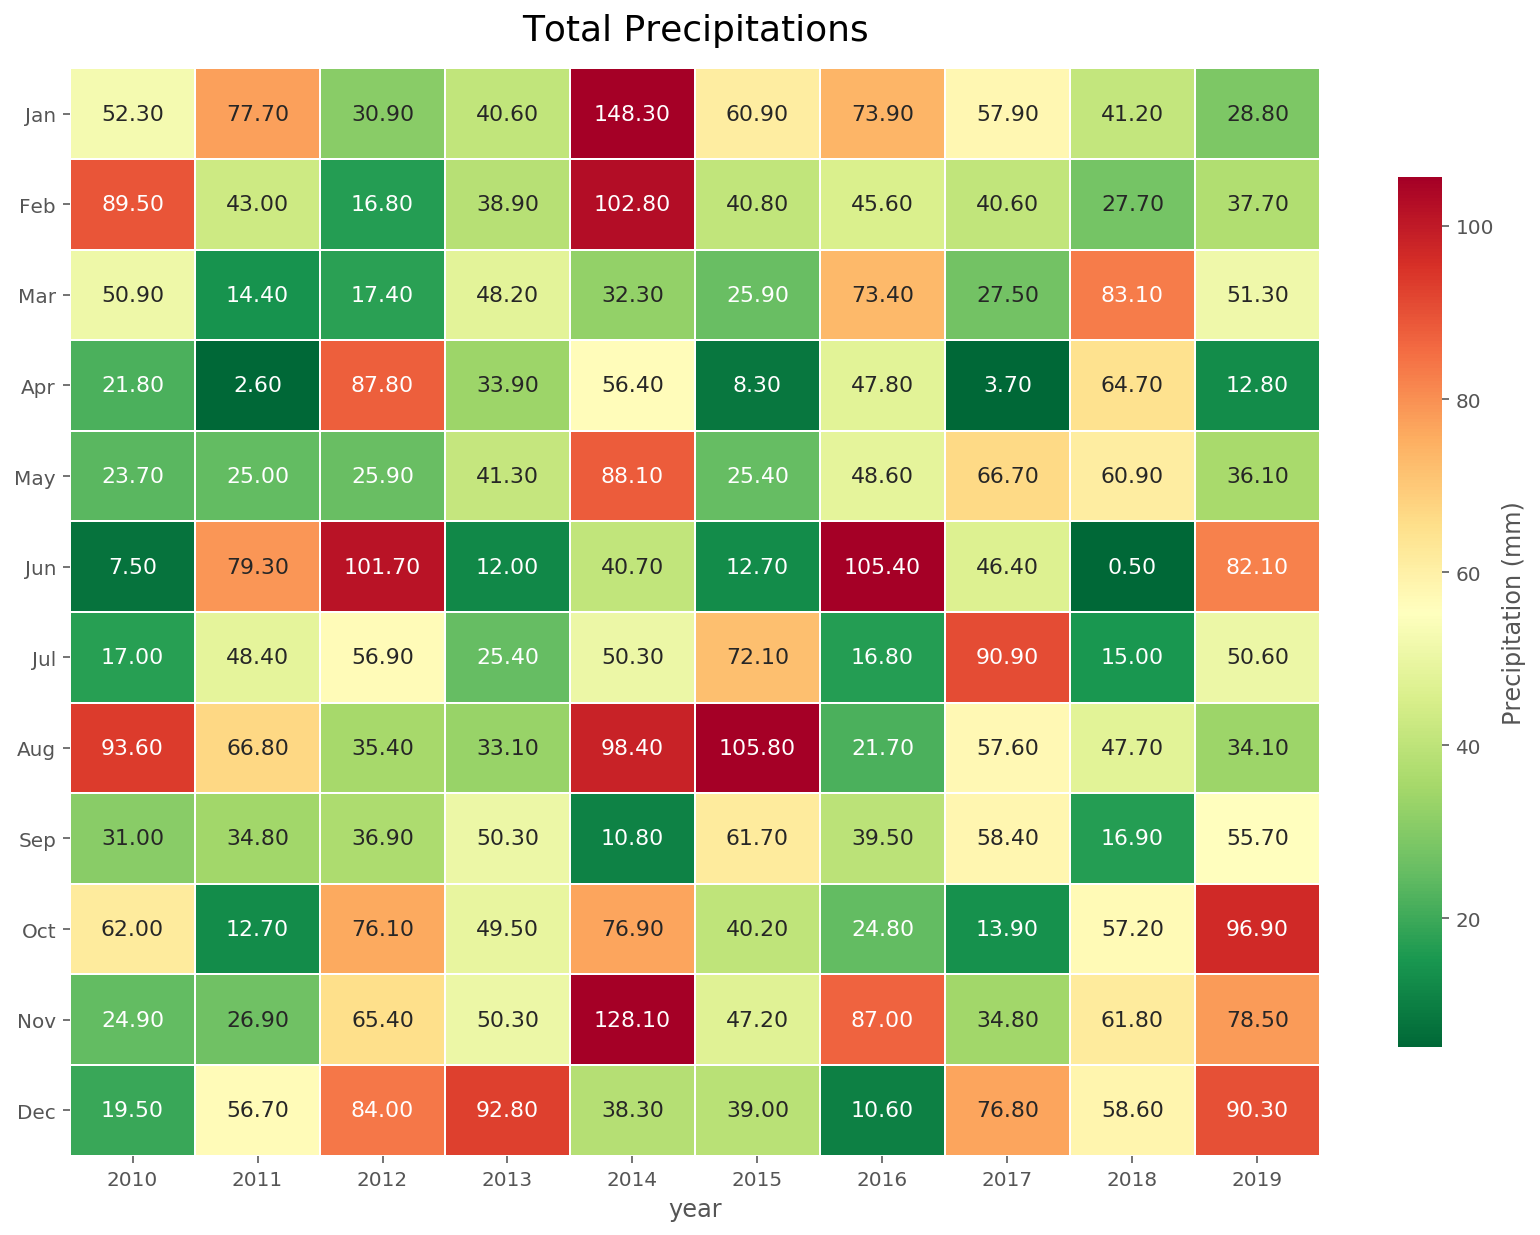

In [23]:
all_month_year_sum_df = pd.pivot_table(df, values="precipitation",index=["month"], columns=["year"], aggfunc=np.sum, fill_value=0)
all_month_year_sum_df = all_month_year_sum_df.set_index([[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_sum_df.index)]])
plot_heatmap(all_month_year_sum_df, 'Total Precipitations')

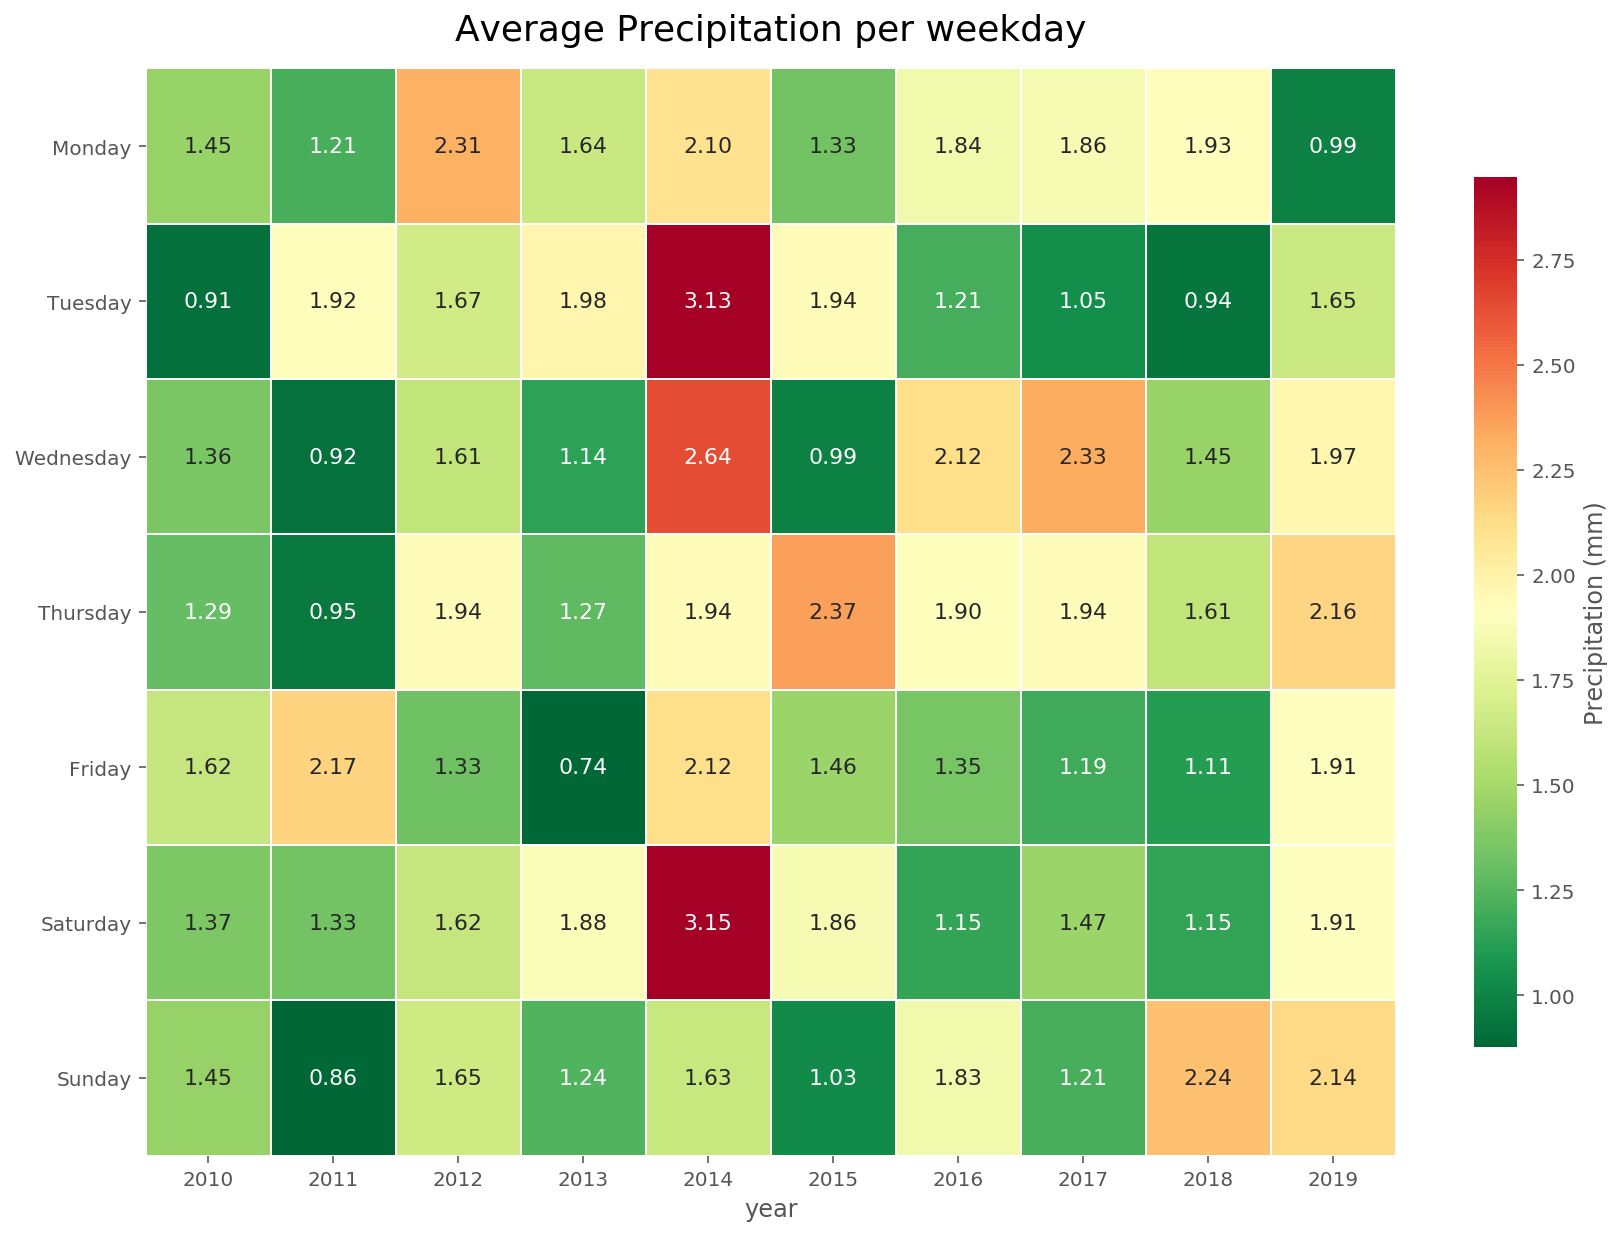

In [24]:
all_weekday_year_df = pd.pivot_table(df, values="precipitation",index=["weekday"], columns=["year"], fill_value=0.0)
all_weekday_year_df = all_weekday_year_df.set_index([[calendar.day_name[i] for i in list(all_weekday_year_df.index)]])
plot_heatmap(all_weekday_year_df, 'Average Precipitation per weekday')

In [25]:
all_month_year_percentage_df = pd.pivot_table(df, values="precipitation",index=["month"], columns=["year"],
                                              aggfunc=lambda x: (x>MIN_PRECIPITATION_MM_DRY).sum()/len(x),
                                              fill_value=0,
                                              margins=True)
all_month_year_percentage_df = all_month_year_percentage_df.set_index([[calendar.month_abbr[i] if isinstance(i, int)
                                                                        else i for i in list(all_month_year_percentage_df.index)]])

lambda x: np.count_nonzero(x) / len(x) or just count raining

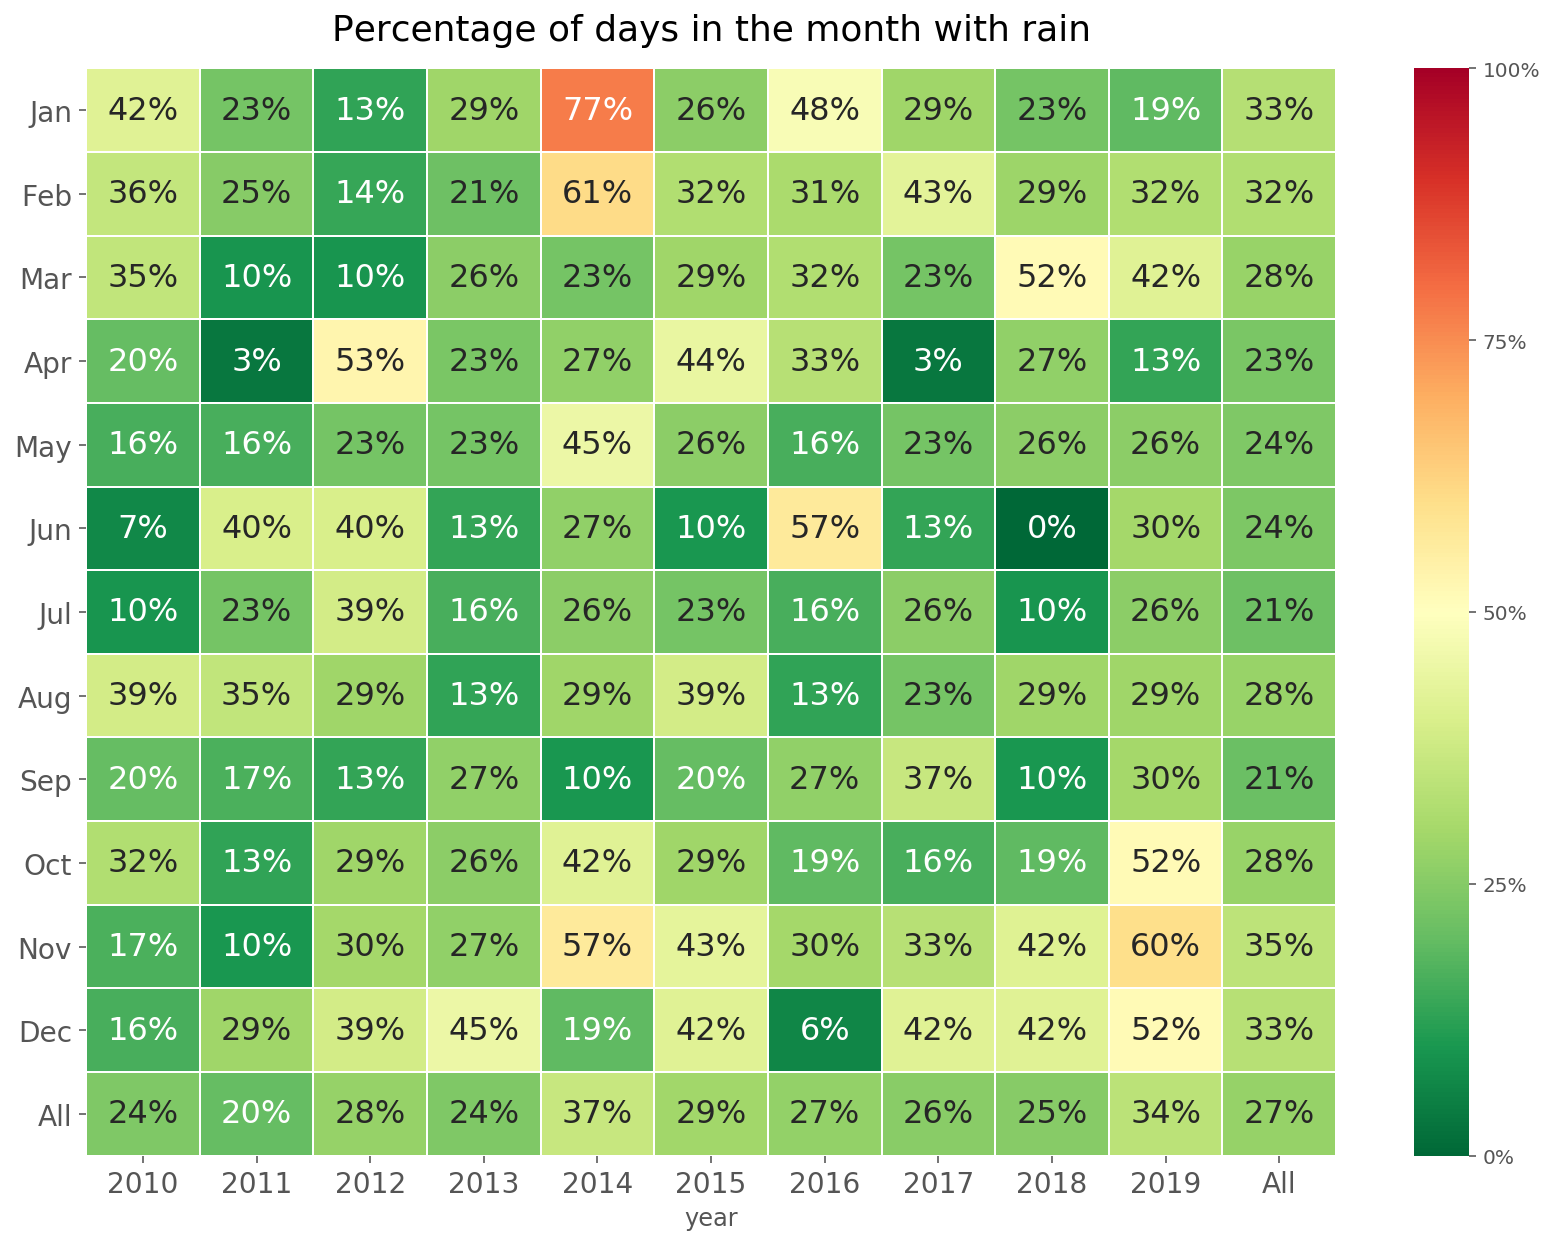

In [26]:
plt.figure(figsize = (14, 10))
ax = sns.heatmap(all_month_year_percentage_df, cmap = 'RdYlGn_r', annot=True, fmt='.0%',
                 vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 16})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50,.75, 1])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
ax.tick_params(rotation = 0)
plt.title('Percentage of days in the month with rain', fontdict={'fontsize':18}, pad=14);

In [27]:
def plot_heatmap_year(year):
    plt.figure(figsize = (16, 10))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="precipitation",
                                  index=["month"], columns=["day"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[calendar.month_abbr[i] for i in list(allByYear_df.index)]])
    ax = sns.heatmap(allByYear_df, cmap = 'RdYlGn_r',
                     vmin=0, vmax=20,
                     annot=False, linewidths=.1,
                     annot_kws={"size": 8}, square=True, cbar_kws={"shrink": .48, 'label': 'Rain (mm)'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    ax.tick_params(rotation = 0)
    plt.title(f'Precipitations {year}', fontdict={'fontsize':18}, pad=14);

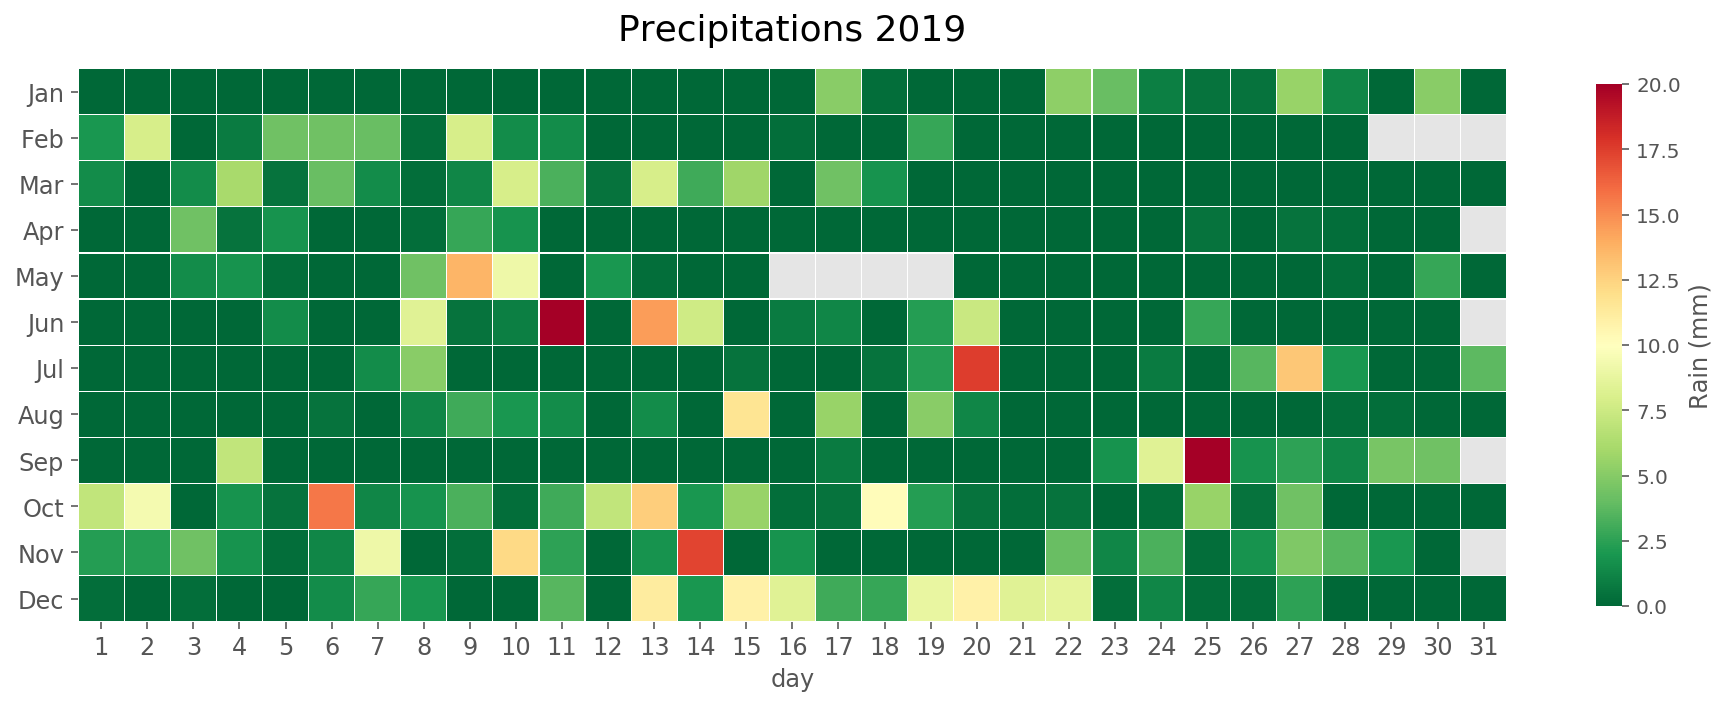

In [28]:
plot_heatmap_year(2019)

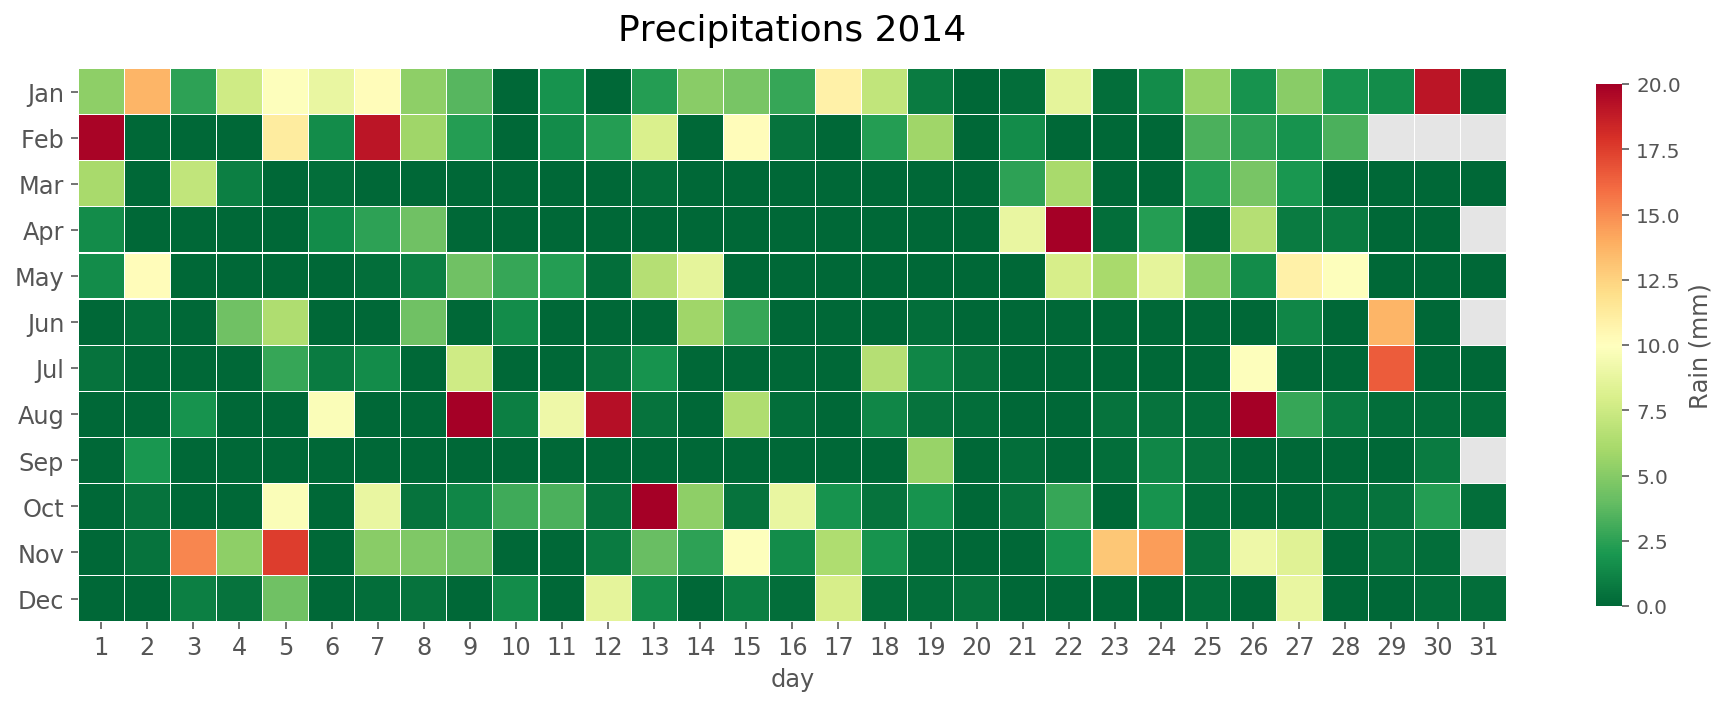

In [29]:
plot_heatmap_year(2014)

In [30]:
all_days_avg_df = df.groupby([df.date.dt.month, df.date.dt.day])['precipitation'].mean()
all_days_avg_df = all_days_avg_df.unstack()
all_days_avg_df = all_days_avg_df.set_index([[calendar.month_abbr[i] for i in list(all_days_avg_df.index)]])

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def make_colormap(seq):
    """
    Return a LinearSegmentedColormap
    seq: list
        a sequence of floats and RGB-tuples. 
        The floats should be increasing and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [32]:
import matplotlib.colors as colors
c = colors.ColorConverter().to_rgb
gyr = make_colormap([c('green'), c('yellow'), 0.25, c('yellow'), c('red')])

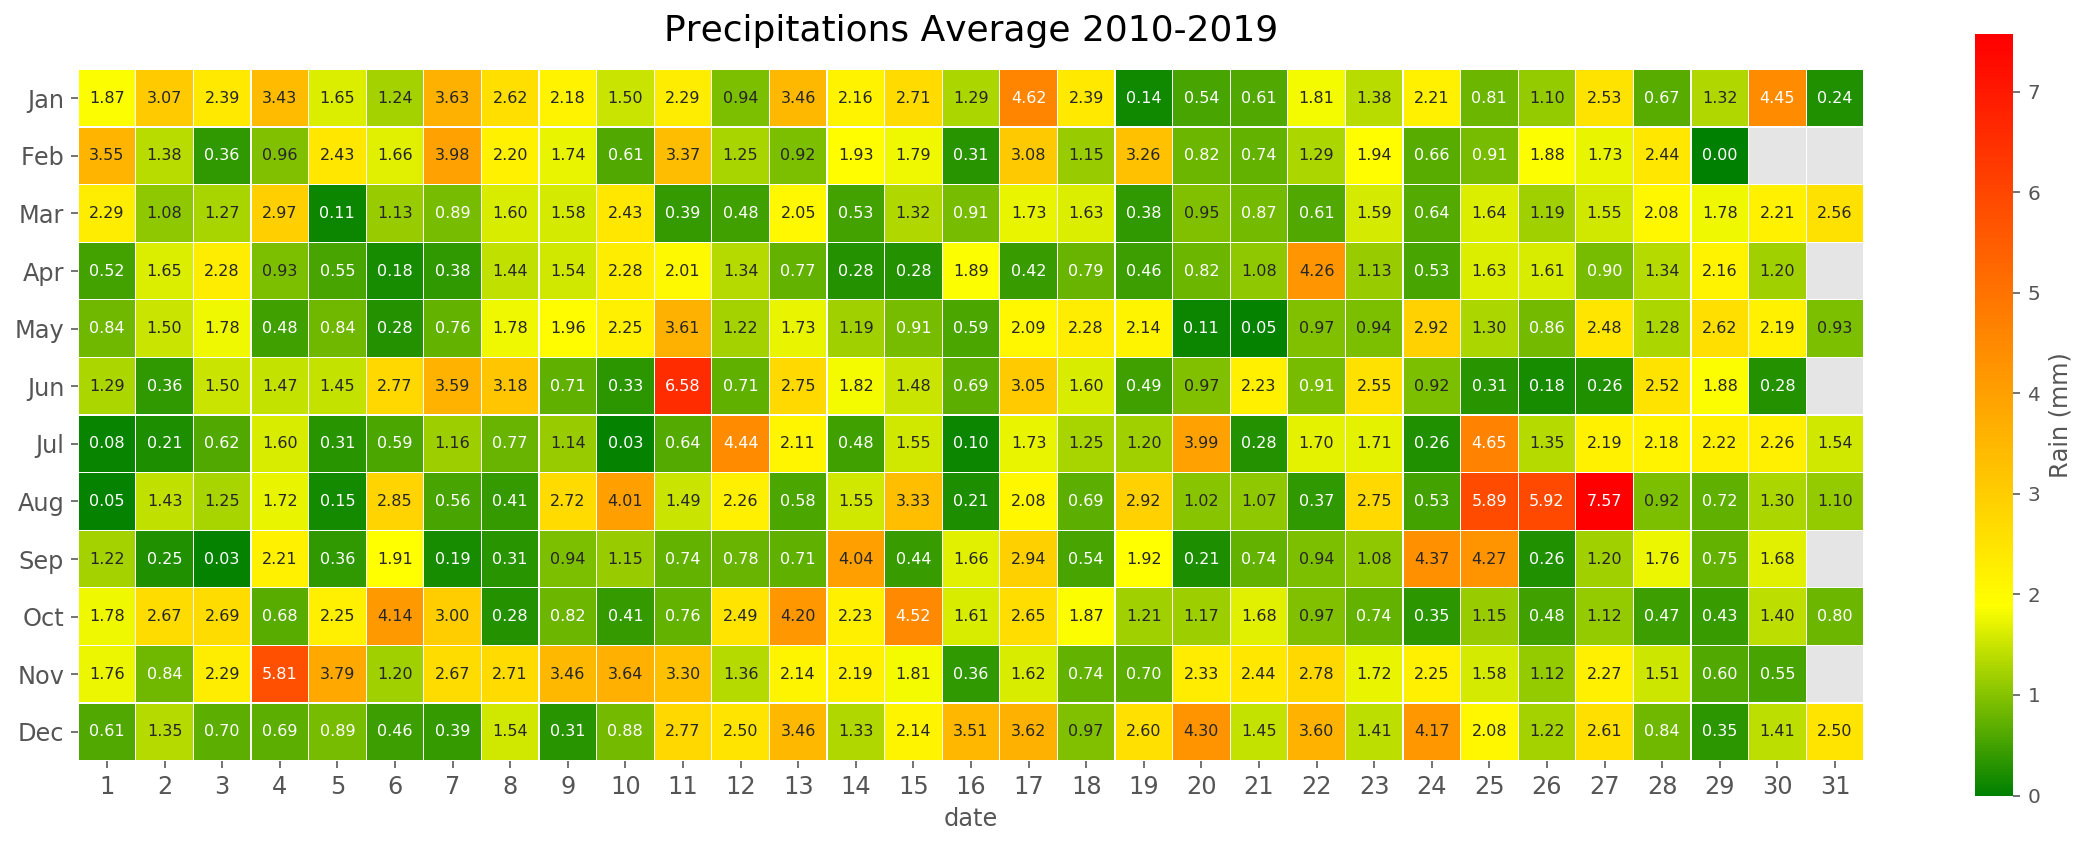

In [33]:
plt.figure(figsize = (20, 14))
ax = sns.heatmap(all_days_avg_df, cmap = gyr, annot=True, fmt='.2f',
                 vmin=0, linewidths=.1,
                 annot_kws={"size": 8}, square=True,  # <-- square cell
                 cbar_kws={"shrink": .5, 'label': 'Rain (mm)'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
_ = plt.title('Precipitations Average 2010-2019', fontdict={'fontsize':18}, pad=14)

In [34]:
custom_palette = sns.color_palette("GnBu", 6)
custom_palette[5] = sns.color_palette("OrRd", 6)[5]

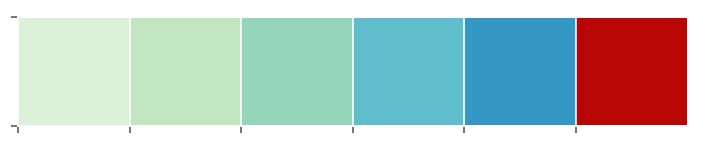

In [35]:
sns.palplot(custom_palette)

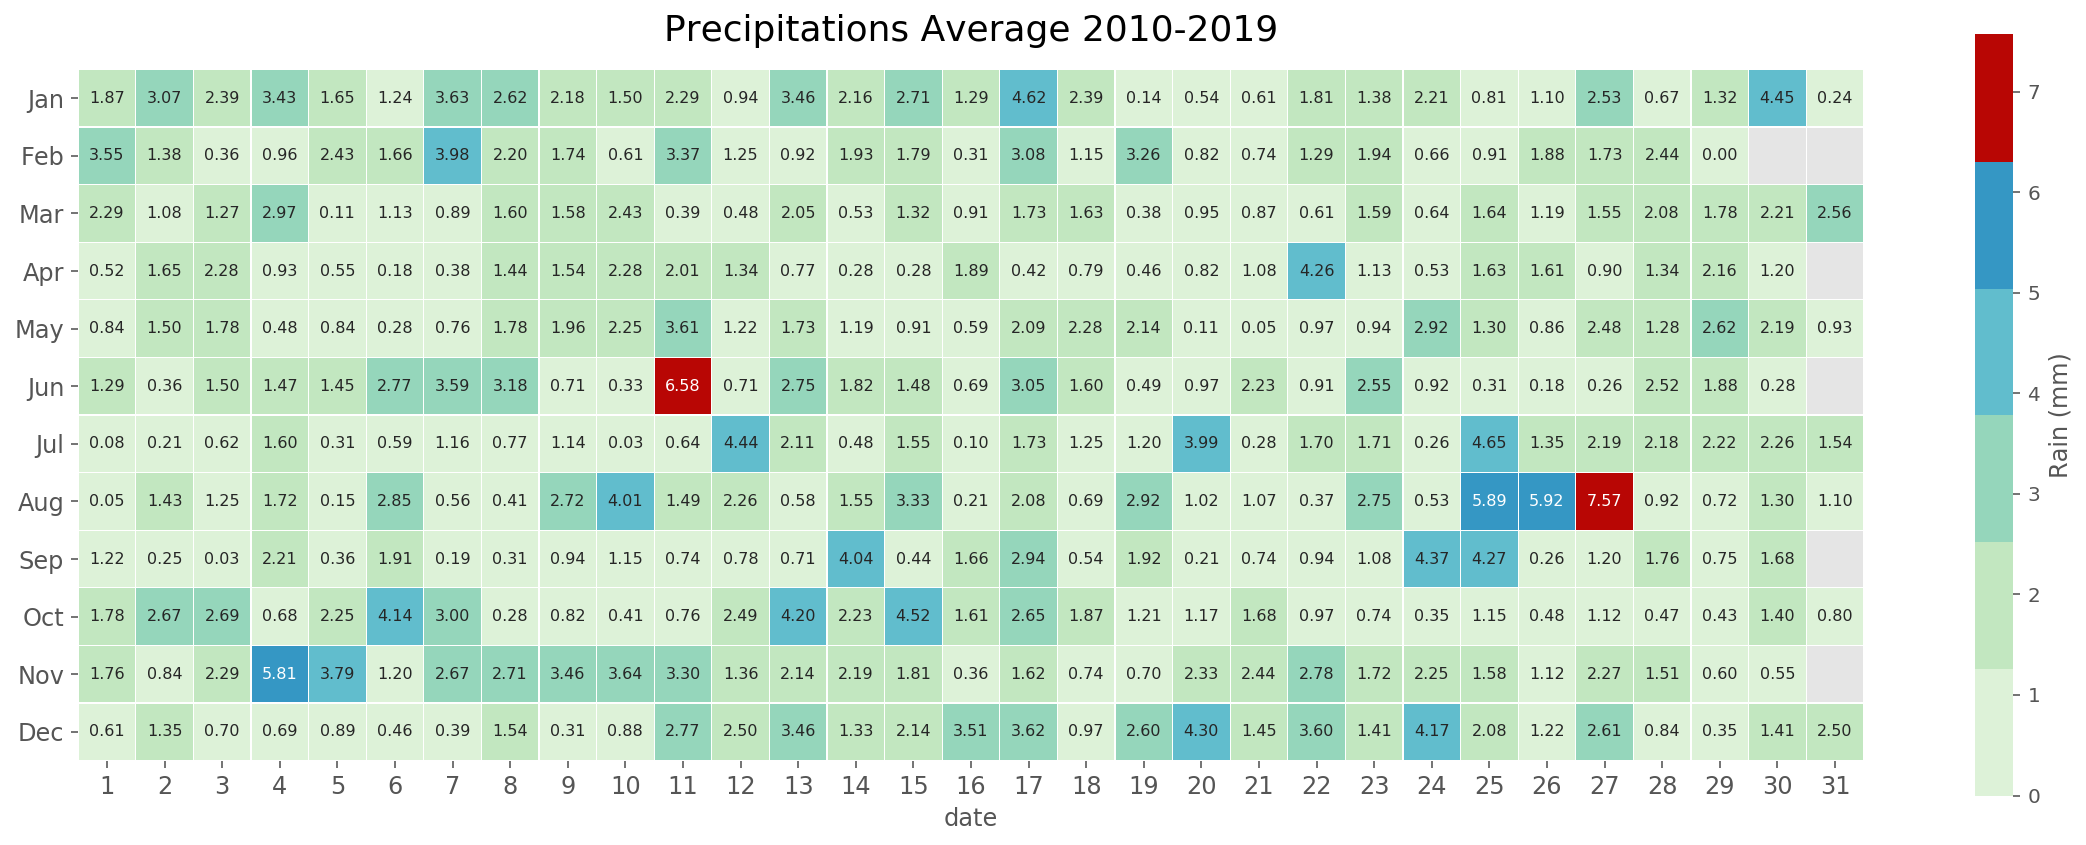

In [36]:
plt.figure(figsize = (20, 14))
ax = sns.heatmap(all_days_avg_df, cmap = custom_palette, annot=True, fmt='.2f',
                 vmin=0, linewidths=.1,
                 annot_kws={"size": 8}, square=True,
                 cbar_kws={"shrink": .5, 'label': 'Rain (mm)'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
_ = plt.title('Precipitations Average 2010-2019', fontdict={'fontsize':18}, pad=14)

In [37]:
df.groupby('year')['raining'].sum()

year
2010     88
2011     74
2012    101
2013     88
2014    134
2015    101
2016    100
2017     94
2018     91
2019    124
Name: raining, dtype: int64

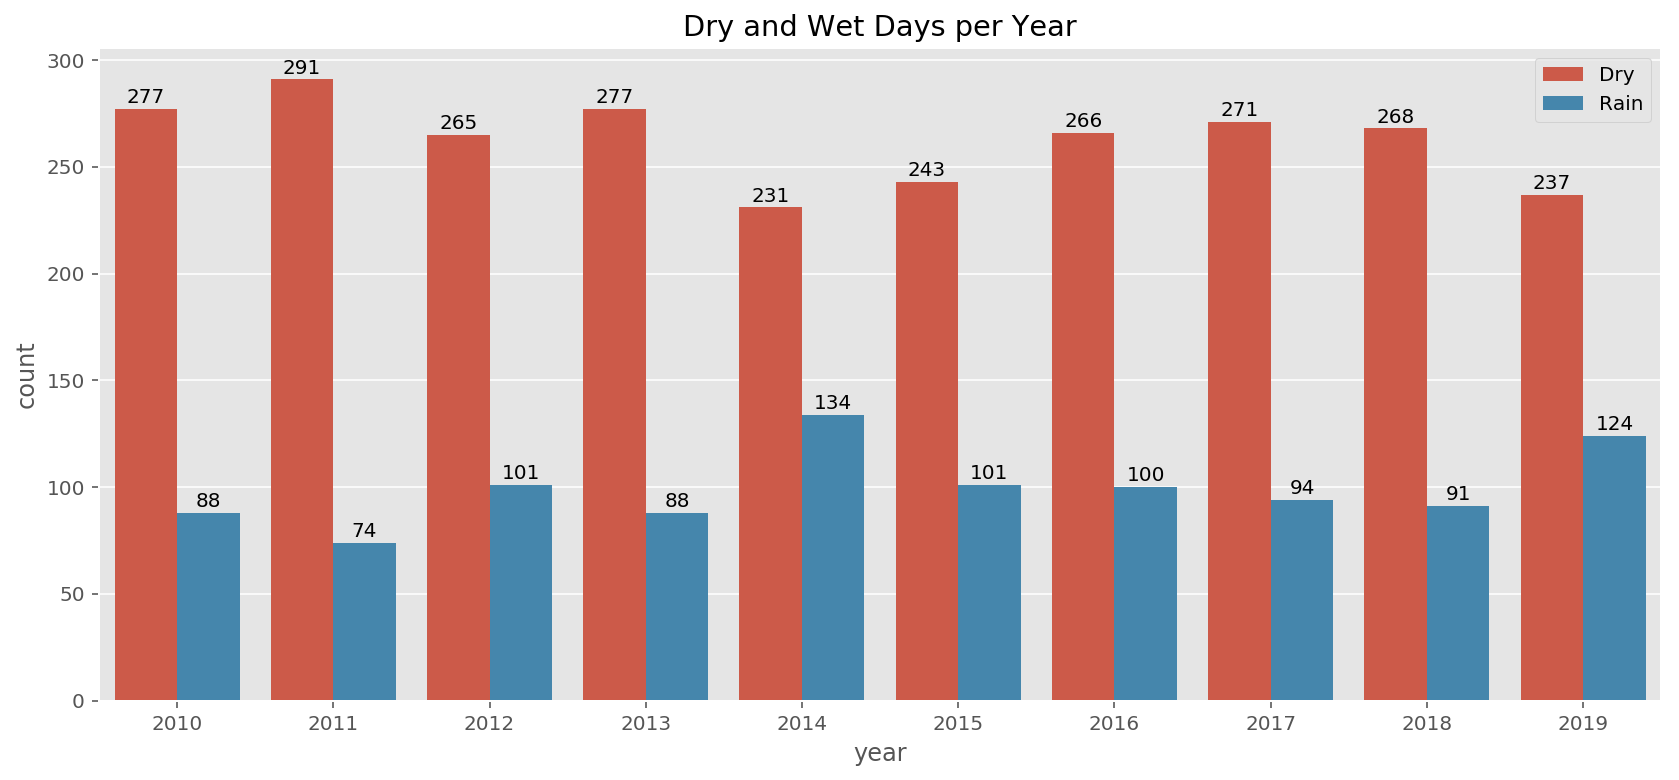

In [38]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x="year", hue="raining", data=df.sort_values(by='year'))
ax.legend(loc='upper right', frameon=True, labels=['Dry', 'Rain'])

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x()+p.get_width()/2., p.get_height()-4),
                ha = 'center', va = 'center',
                xytext = (0, 10), textcoords = 'offset points')

_ = ax.set_title("Dry and Wet Days per Year")

In [39]:
df['value_grp'] = (df['raining'].diff() != 0).astype('int').cumsum()

In [40]:
(df['raining'].diff() != 0).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
3616    1
3617    1
3618    0
3619    0
3620    0
Name: raining, Length: 3621, dtype: int64

In [41]:
df.head(10)[['date', 'precipitation', 'raining', 'value_grp']]

date  precipitation  raining  value_grp
0 2010-01-01            0.0        0          1
1 2010-01-02            0.0        0          1
2 2010-01-03            0.0        0          1
3 2010-01-04            0.0        0          1
4 2010-01-05            0.3        0          1
5 2010-01-06            1.5        1          2
6 2010-01-07            3.0        1          2
7 2010-01-08            1.0        0          3
8 2010-01-09            0.3        0          3
9 2010-01-10            0.0        0          3

In [74]:
grouped_values = df.groupby('value_grp')
consecutive_df = pd.DataFrame({'BeginDate' : grouped_values.date.first(), 
              'EndDate' : grouped_values.date.last(),
              'Consecutive' : grouped_values.size(),
              'condition': grouped_values.raining.max() }).reset_index(drop=True)
consecutive_df['condition'].replace({0: 'Dry', 1: 'Rain'}, inplace=True)
consecutive_df.sort_values(by='Consecutive', ascending=False).head(10)

BeginDate    EndDate  Consecutive condition
974  2018-05-31 2018-07-27           58       Dry
52   2010-06-10 2010-07-14           35       Dry
836  2017-03-24 2017-04-26           34       Dry
132  2011-04-06 2011-05-06           31       Dry
196  2011-11-06 2011-11-30           25       Dry
114  2011-01-19 2011-02-10           23       Dry
1026 2018-12-25 2019-01-16           23       Dry
432  2013-11-22 2013-12-13           22       Dry
1060 2019-04-11 2019-05-02           22       Dry
388  2013-07-04 2013-07-24           21       Dry

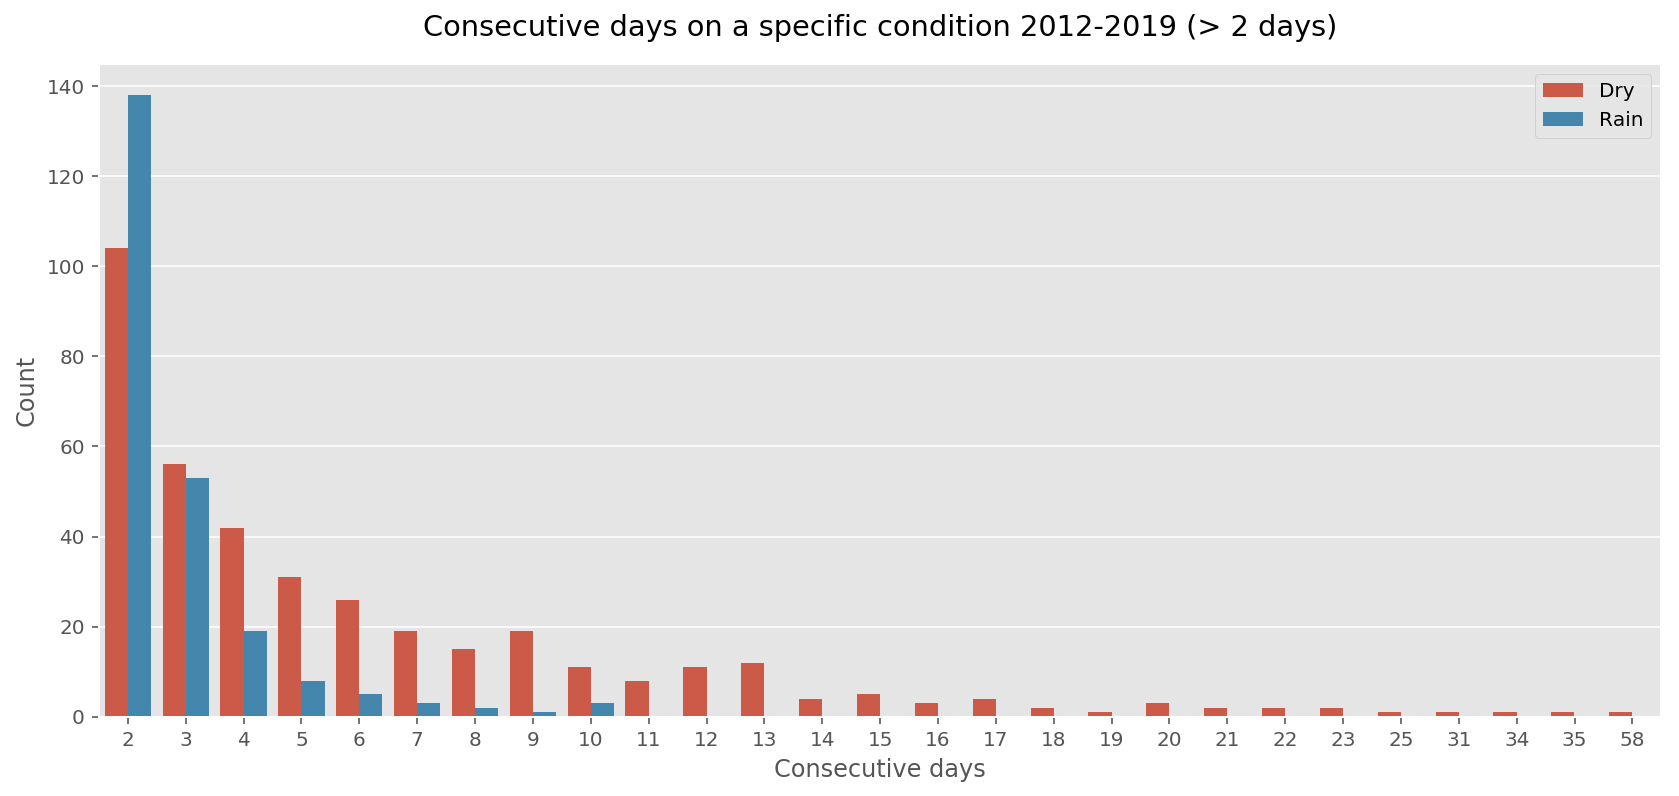

In [75]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x='Consecutive', hue='condition', data=consecutive_df.query('Consecutive >= 2'))
ax.set_title('Consecutive days on a specific condition 2012-2019 (> 2 days)', pad=14)
ax.set(xlabel='Consecutive days', ylabel='Count')
_ = plt.legend(loc='upper right')

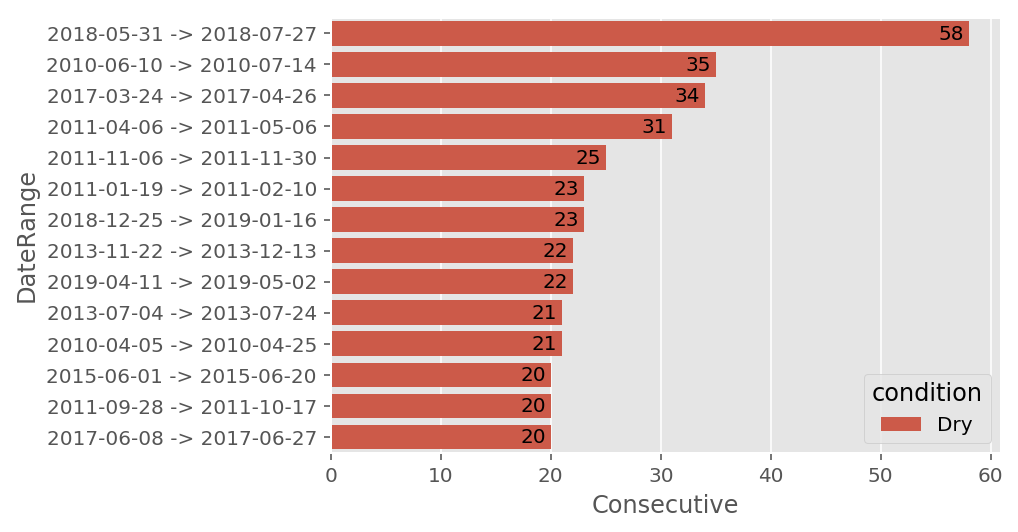

In [76]:
consecutive_df['DateRange'] = consecutive_df["BeginDate"].astype(str) + ' -> ' + consecutive_df["EndDate"].astype(str)
ax = sns.barplot(x="Consecutive", y="DateRange", hue="condition", data=consecutive_df.sort_values(by='Consecutive', ascending=False).head(14))

for p in ax.patches:
 width = p.get_width()
 ax.text(width -1.6, p.get_y() + p.get_height()/2. + 0.2,'{:1.0f}'.format(width), ha="center")

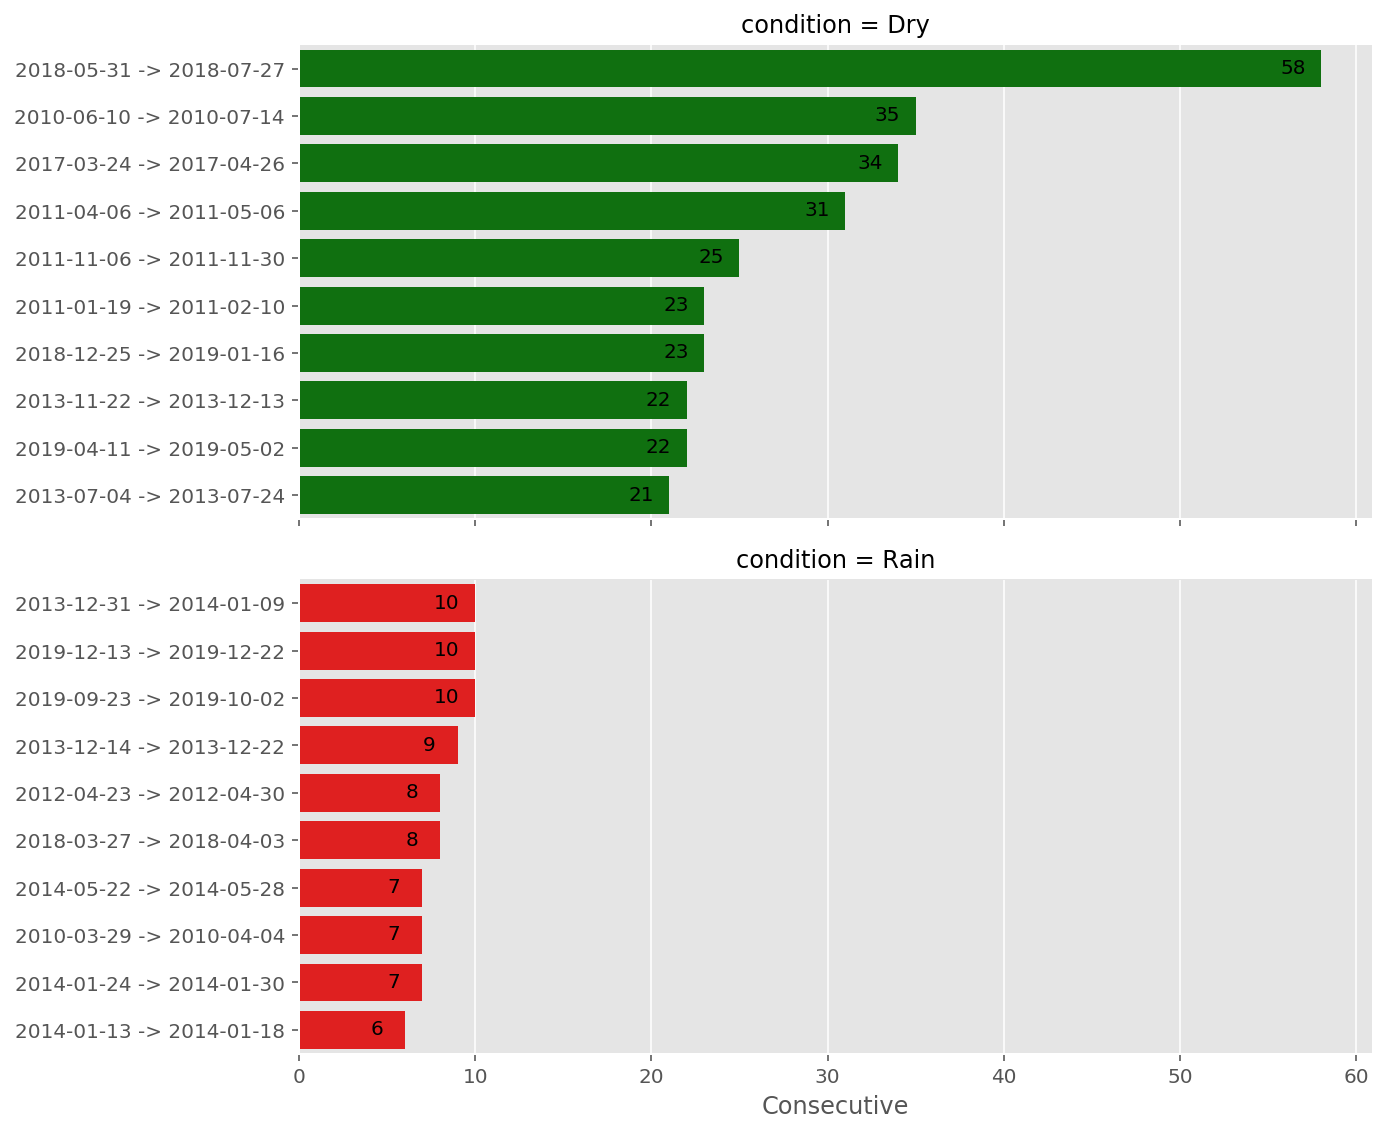

In [140]:
df_top10_per_condition = consecutive_df.sort_values(by='Consecutive',ascending = False).groupby('condition').head(10)

d = {'color': ['g', 'r']}
g = sns.FacetGrid(df_top10_per_condition, row="condition",
                      hue='condition',
                      hue_kws=d,
                      sharey=False)

g.fig.set_figheight(8)
g.fig.set_figwidth(10)
    
_ = g.map(sns.barplot, "Consecutive", "DateRange")
_ = g.set(ylabel='')

# This is just to add the numbers inside the bars
for ax in g.axes.flat:
 for p in ax.patches:
  width = p.get_width()
  ax.text(width -1.6, p.get_y() + p.get_height()/2. + 0.1,'{:1.0f}'.format(width), ha="center")

In [45]:
custom_palette = sns.diverging_palette(128, 240, n=10)

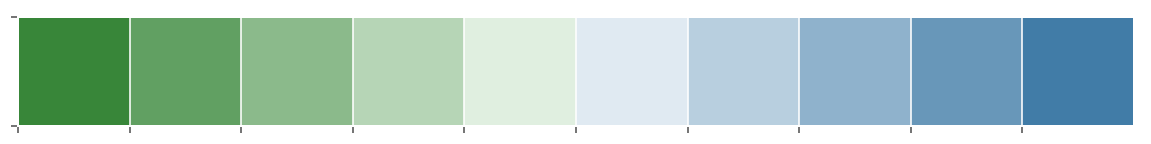

In [46]:
sns.palplot(custom_palette)

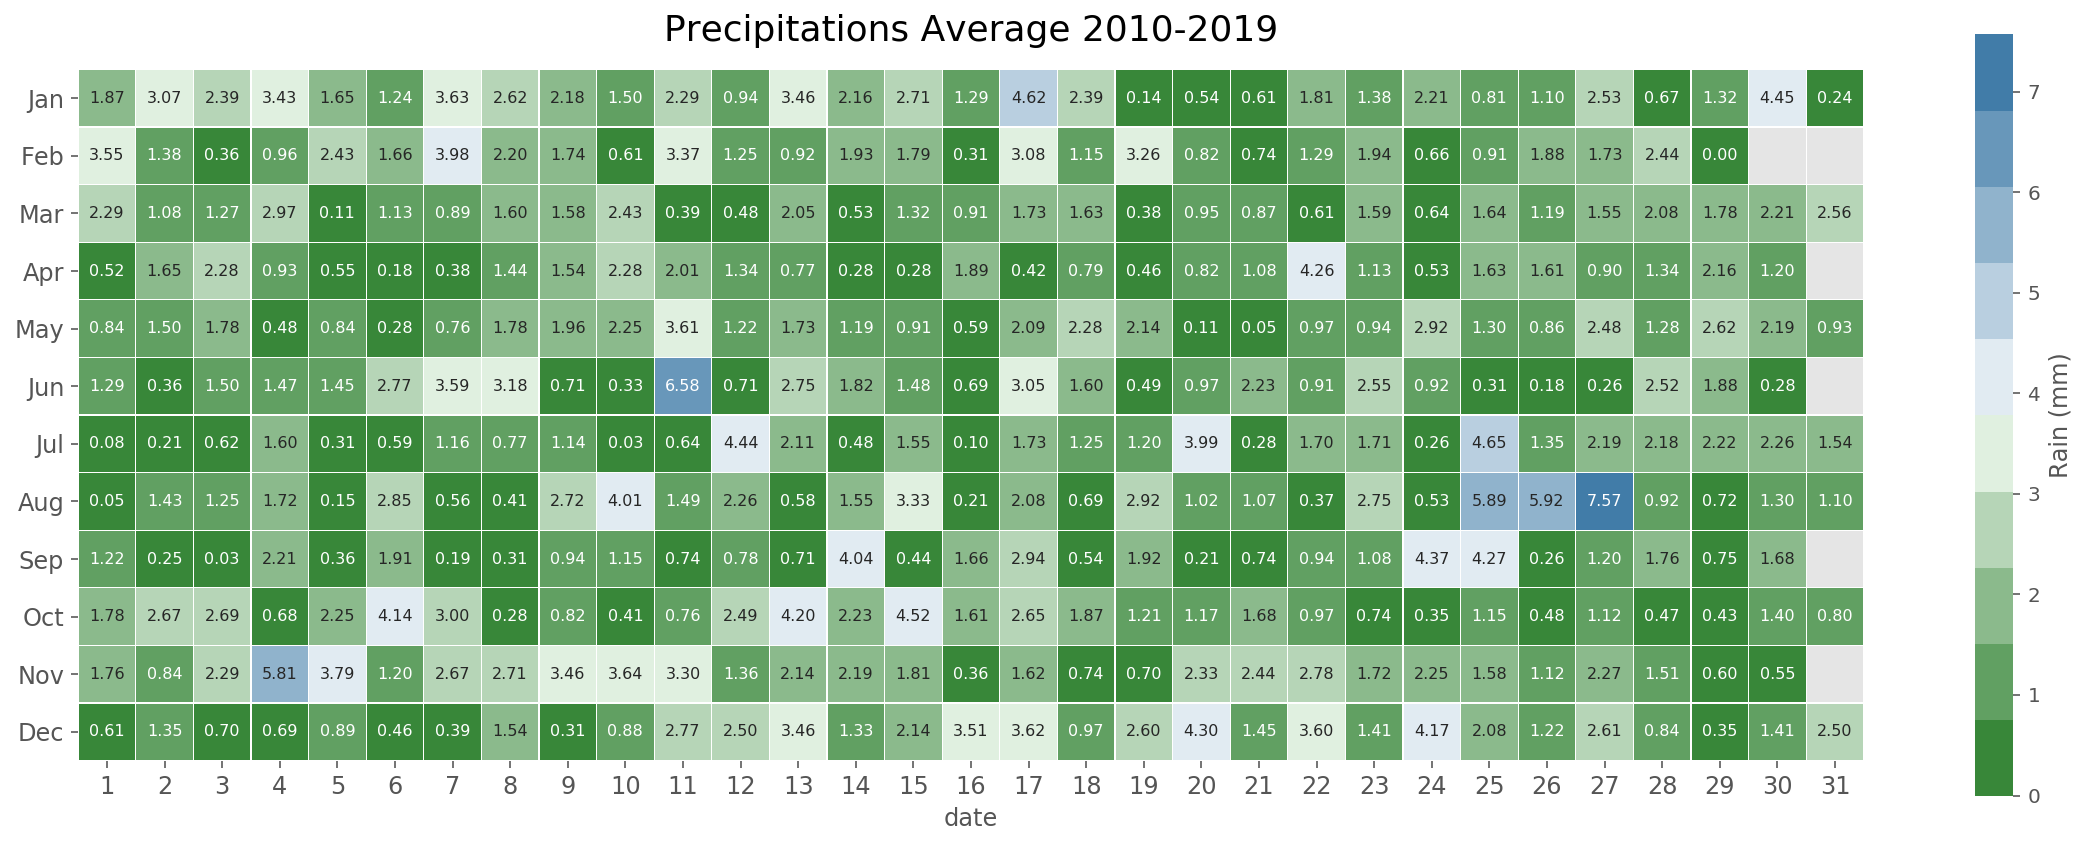

In [47]:
plt.figure(figsize = (20, 14))
ax = sns.heatmap(all_days_avg_df, cmap = custom_palette, annot=True, fmt='.2f',
                 vmin=0, linewidths=.1,
                 annot_kws={"size": 8}, square=True,
                 cbar_kws={"shrink": .5, 'label': 'Rain (mm)'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
_ = plt.title('Precipitations Average 2010-2019', fontdict={'fontsize':18}, pad=14)

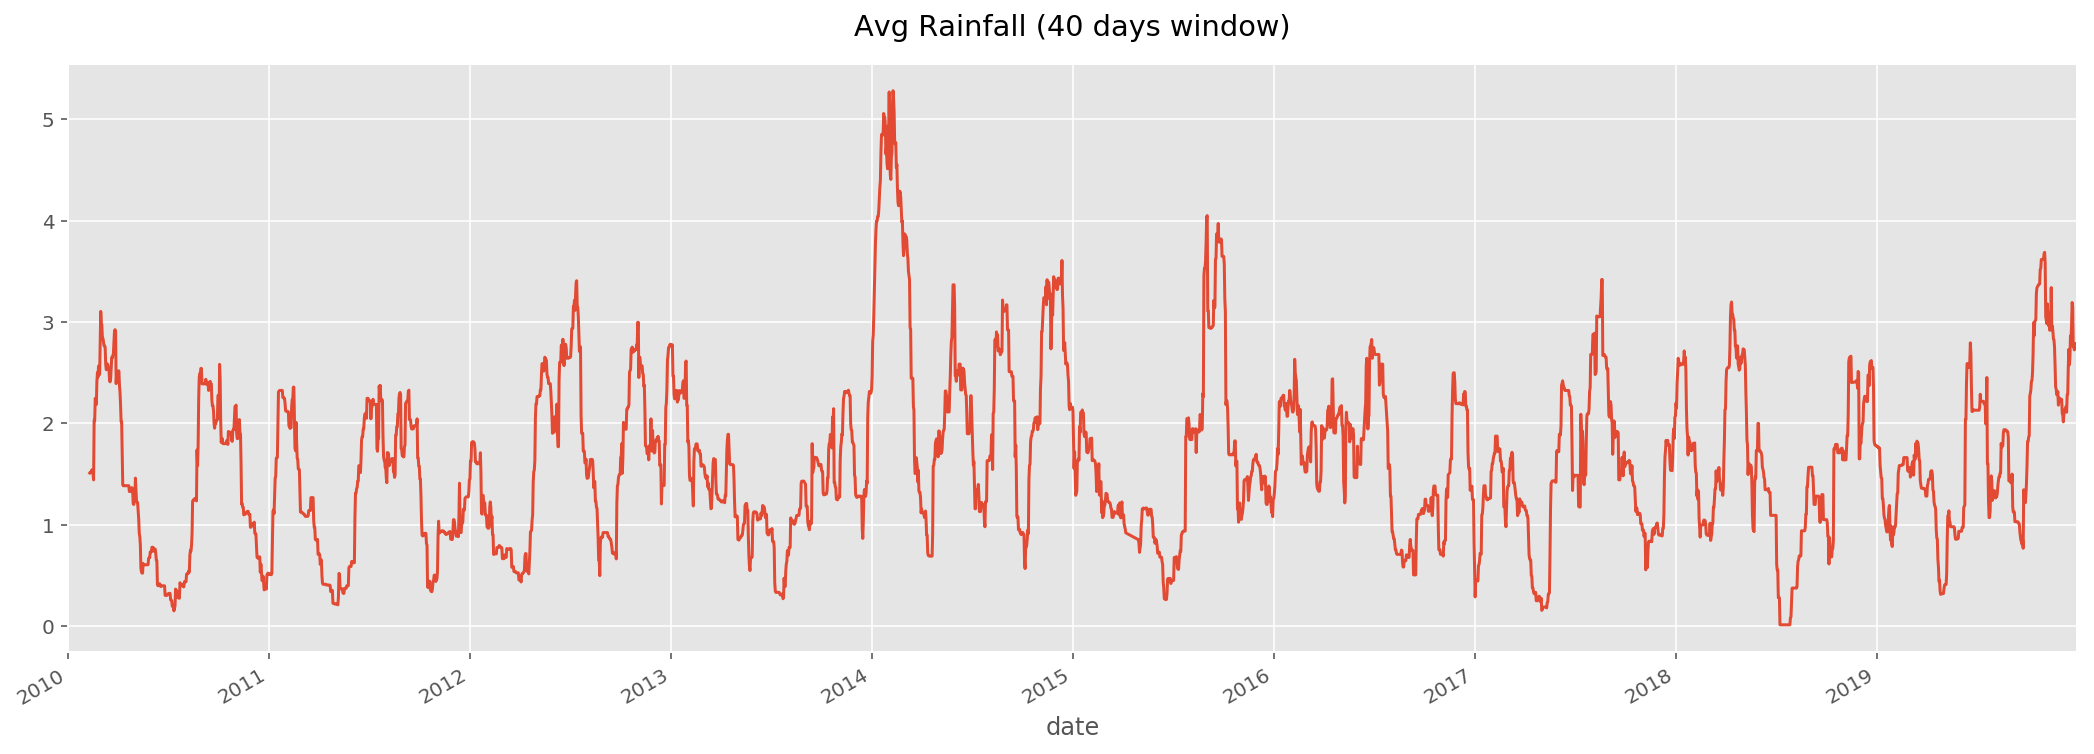

In [48]:
plt.figure(figsize = (18, 6))
plt.title('Avg Rainfall (40 days window)', pad=14)
_ = df.set_index('date')['precipitation'].rolling(40).mean().plot()

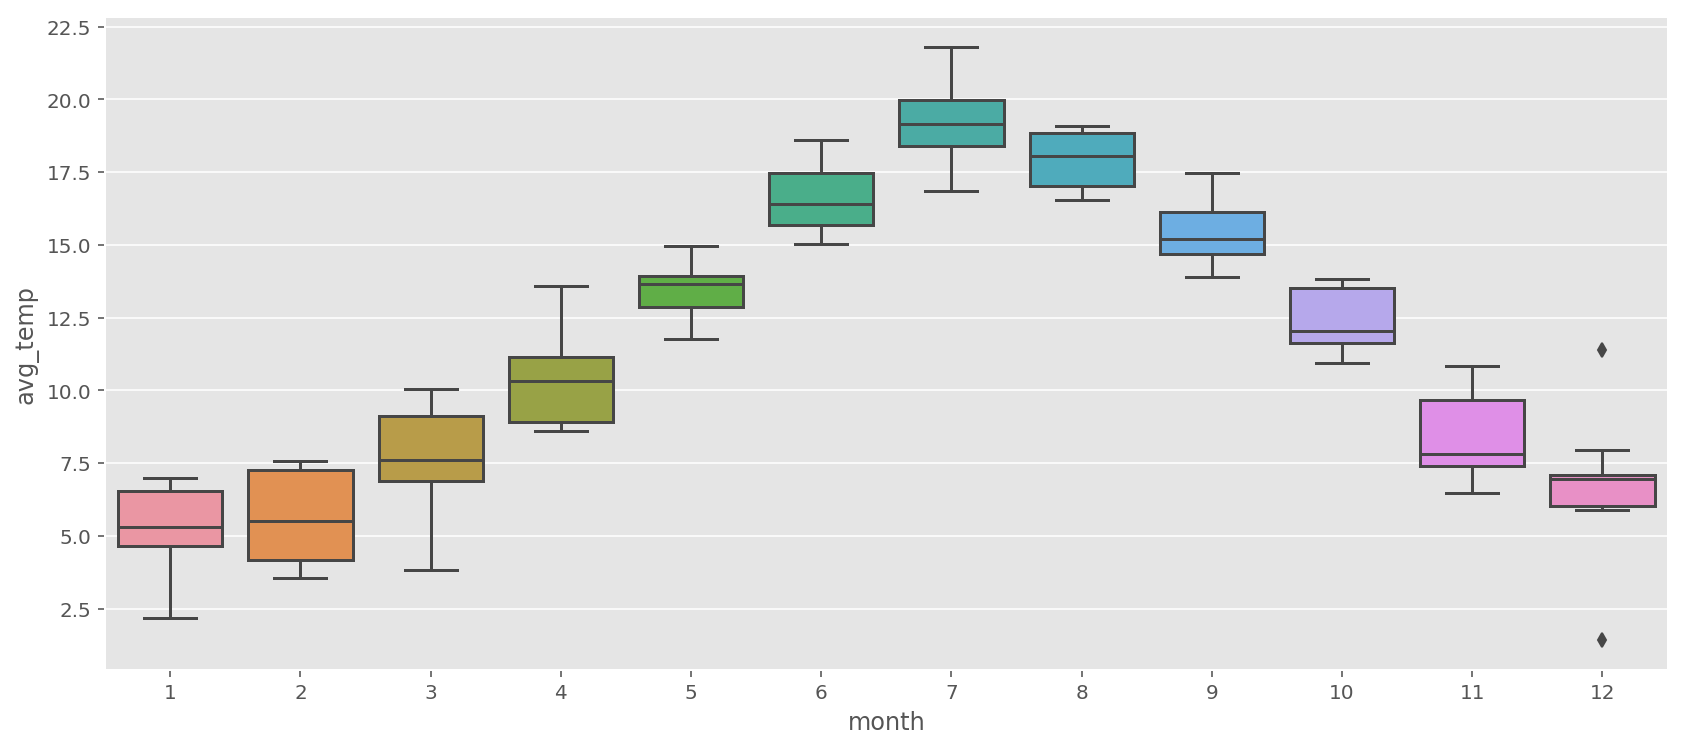

In [49]:
ops_month_df= df.groupby(['month', 'year']).mean()['avg_temp'].reset_index()
plt.figure(figsize = (14, 6))
ax = sns.boxplot(x = "month", y = "avg_temp", data = ops_month_df)

In [50]:
df.groupby(['month', 'year']).mean()['avg_temp'].reset_index()

month  year   avg_temp
0        1  2010   2.183871
1        1  2011   5.083871
2        1  2012   6.593548
3        1  2013   4.551613
4        1  2014   7.006452
..     ...   ...        ...
115     12  2015  11.374194
116     12  2016   6.883871
117     12  2017   5.990323
118     12  2018   7.941935
119     12  2019   7.077419

[120 rows x 3 columns]

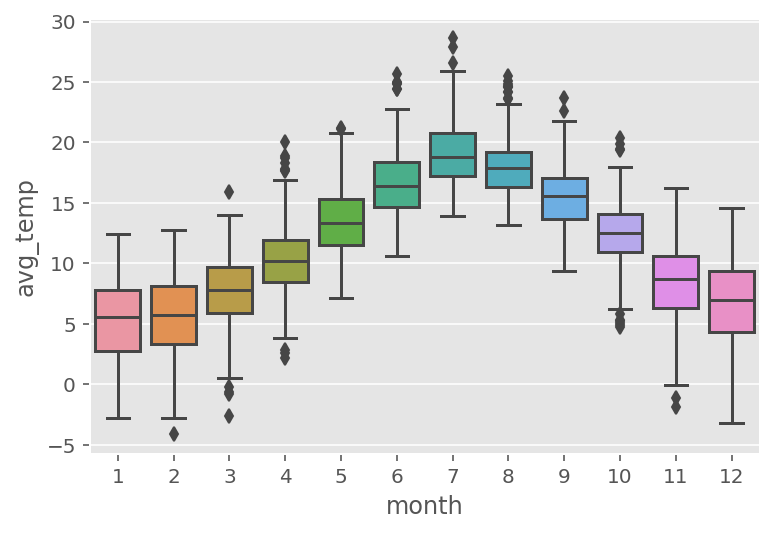

In [51]:
sns.boxplot(x = "month", y = "avg_temp", data = df)

In [52]:
def plotHeatmap(df, title):
    plt.figure(figsize = (20, 8))

    ax = sns.heatmap(df, cmap = 'RdYlBu_r', fmt='.2f', annot=True,
                     linewidths=.2, annot_kws={"size": 8}, square=True,
                     cbar_kws={"shrink": .9, 'label': 'Temperature °C'})
    cbar = ax.collections[0].colorbar
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
    ax.tick_params(rotation = 0)
    plt.title(title, fontdict={'fontsize':18}, pad=14);

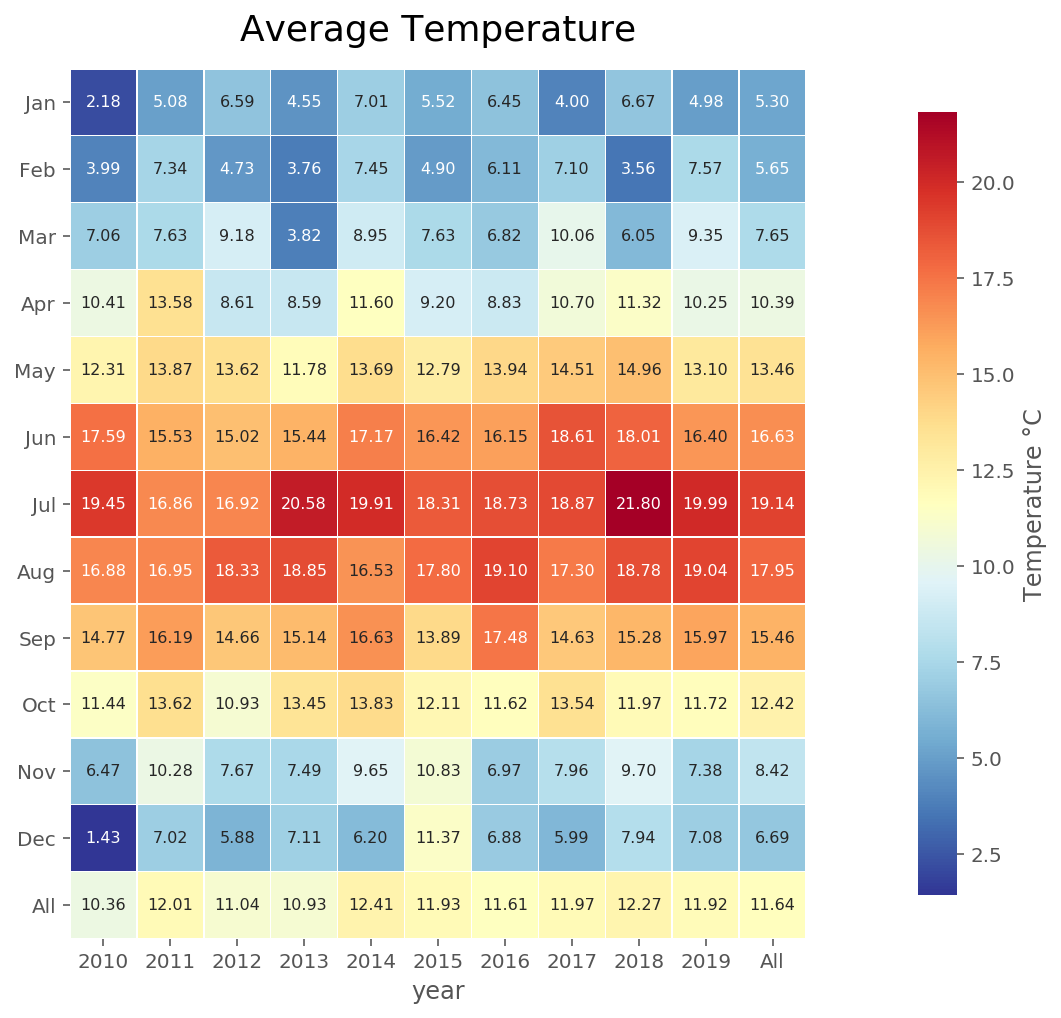

In [53]:
allMonthYear_df = pd.pivot_table(df, values="avg_temp",index=["month"], columns=["year"], fill_value=None, margins=True)
allMonthYear_df = allMonthYear_df.set_index([[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(allMonthYear_df.index)]])
plotHeatmap(allMonthYear_df, 'Average Temperature')

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


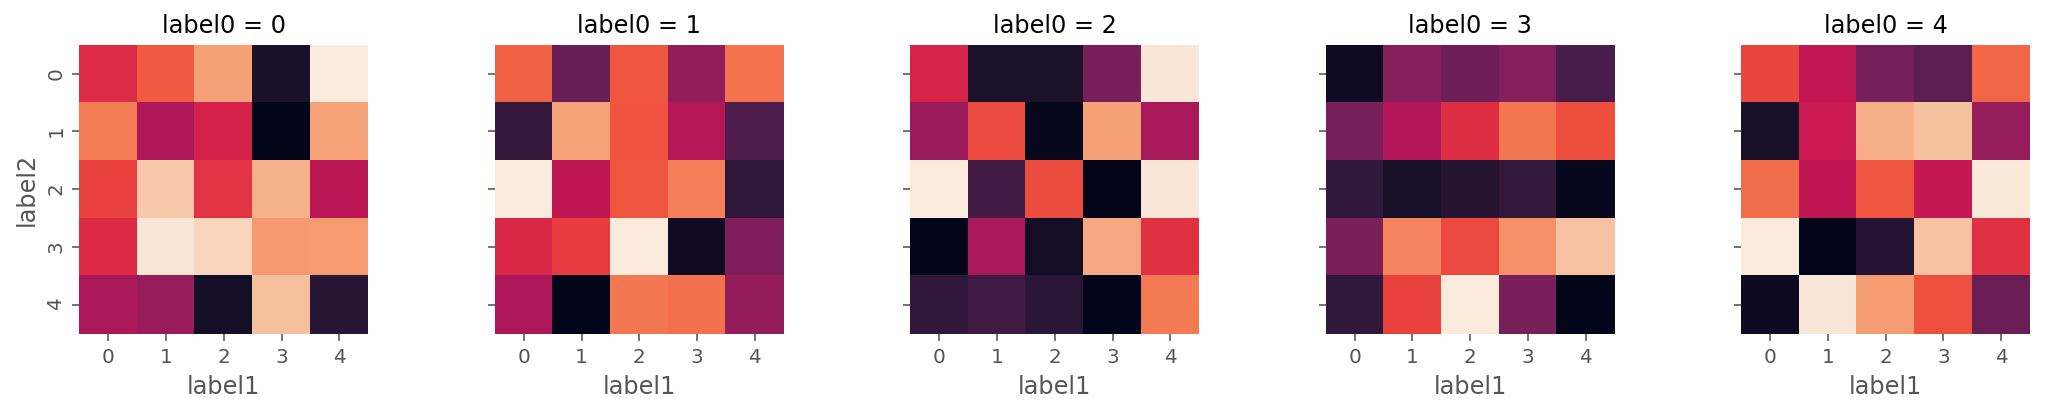

In [54]:
# Generate a set of sample data
np.random.seed(0)
indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
 names=('label0', 'label1', 'label2'))
data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
 index=indices, columns=('value',)).reset_index()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(data, col='label0')
fg.map_dataframe(draw_heatmap, 'label1', 'label2', 'value', cbar=False, square = True)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal','box-forced')
plt.show()

In [55]:
data

label0  label1  label2      value
0         0       0       0  54.881350
1         0       0       1  71.518937
2         0       0       2  60.276338
3         0       0       3  54.488318
4         0       0       4  42.365480
..      ...     ...     ...        ...
120       4       4       0  72.525428
121       4       4       1  50.132438
122       4       4       2  95.608363
123       4       4       3  64.399020
124       4       4       4  42.385505

[125 rows x 4 columns]

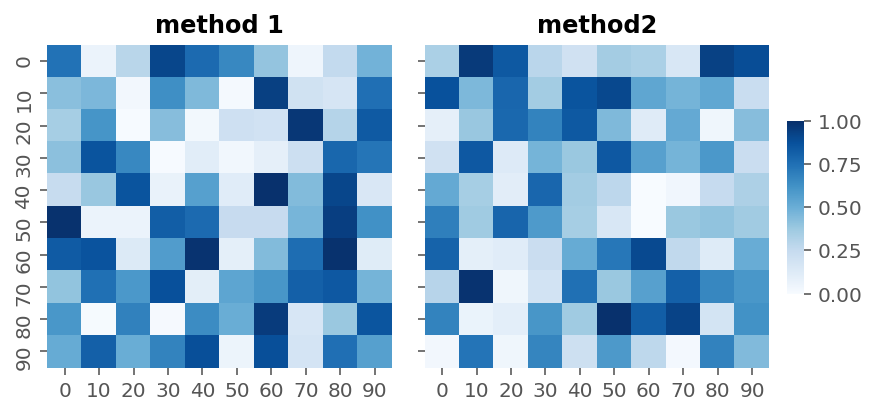

In [72]:
import itertools

methods=['method 1', 'method2']
times = range(0, 100, 10)
data = pd.DataFrame(list(itertools.product(methods, times, times)))
data.columns = ['method', 'dtsi','rtsi']
data['nw_score'] = np.random.sample(data.shape[0])

def facet_heatmap(data, color, **kws):
    data = data.pivot(index="dtsi", columns='rtsi', values='nw_score')
    sns.heatmap(data, cmap='Blues', **kws)  # <-- Pass kwargs to heatmap

with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(data, col="method", col_wrap=2, size=3, aspect=1)

cbar_ax = g.fig.add_axes([.92, .3, .02, .4])

g = g.map_dataframe(facet_heatmap,
                    cbar_ax=cbar_ax,
                    vmin=0, vmax=1)

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)
g.fig.subplots_adjust(right=.9) 

In [57]:
paris_df = pd.read_csv('/kaggle/input/paris20102019/ParisMeteo2010-2019.csv', 
                               usecols=['DATE', 'PRCP', 'TAVG'], parse_dates=['DATE'])
#df['DATE'] = df['DATE'].astype('datetime64[ns]') # needed if date format is not standard
paris_df.columns = ['date', 'precipitation', 'avg_temp']
paris_df.sample(3)

date  precipitation  avg_temp
1148 2013-02-25            0.5       1.0
3124 2018-08-24            3.0      17.2
2914 2018-01-26            1.5       7.2

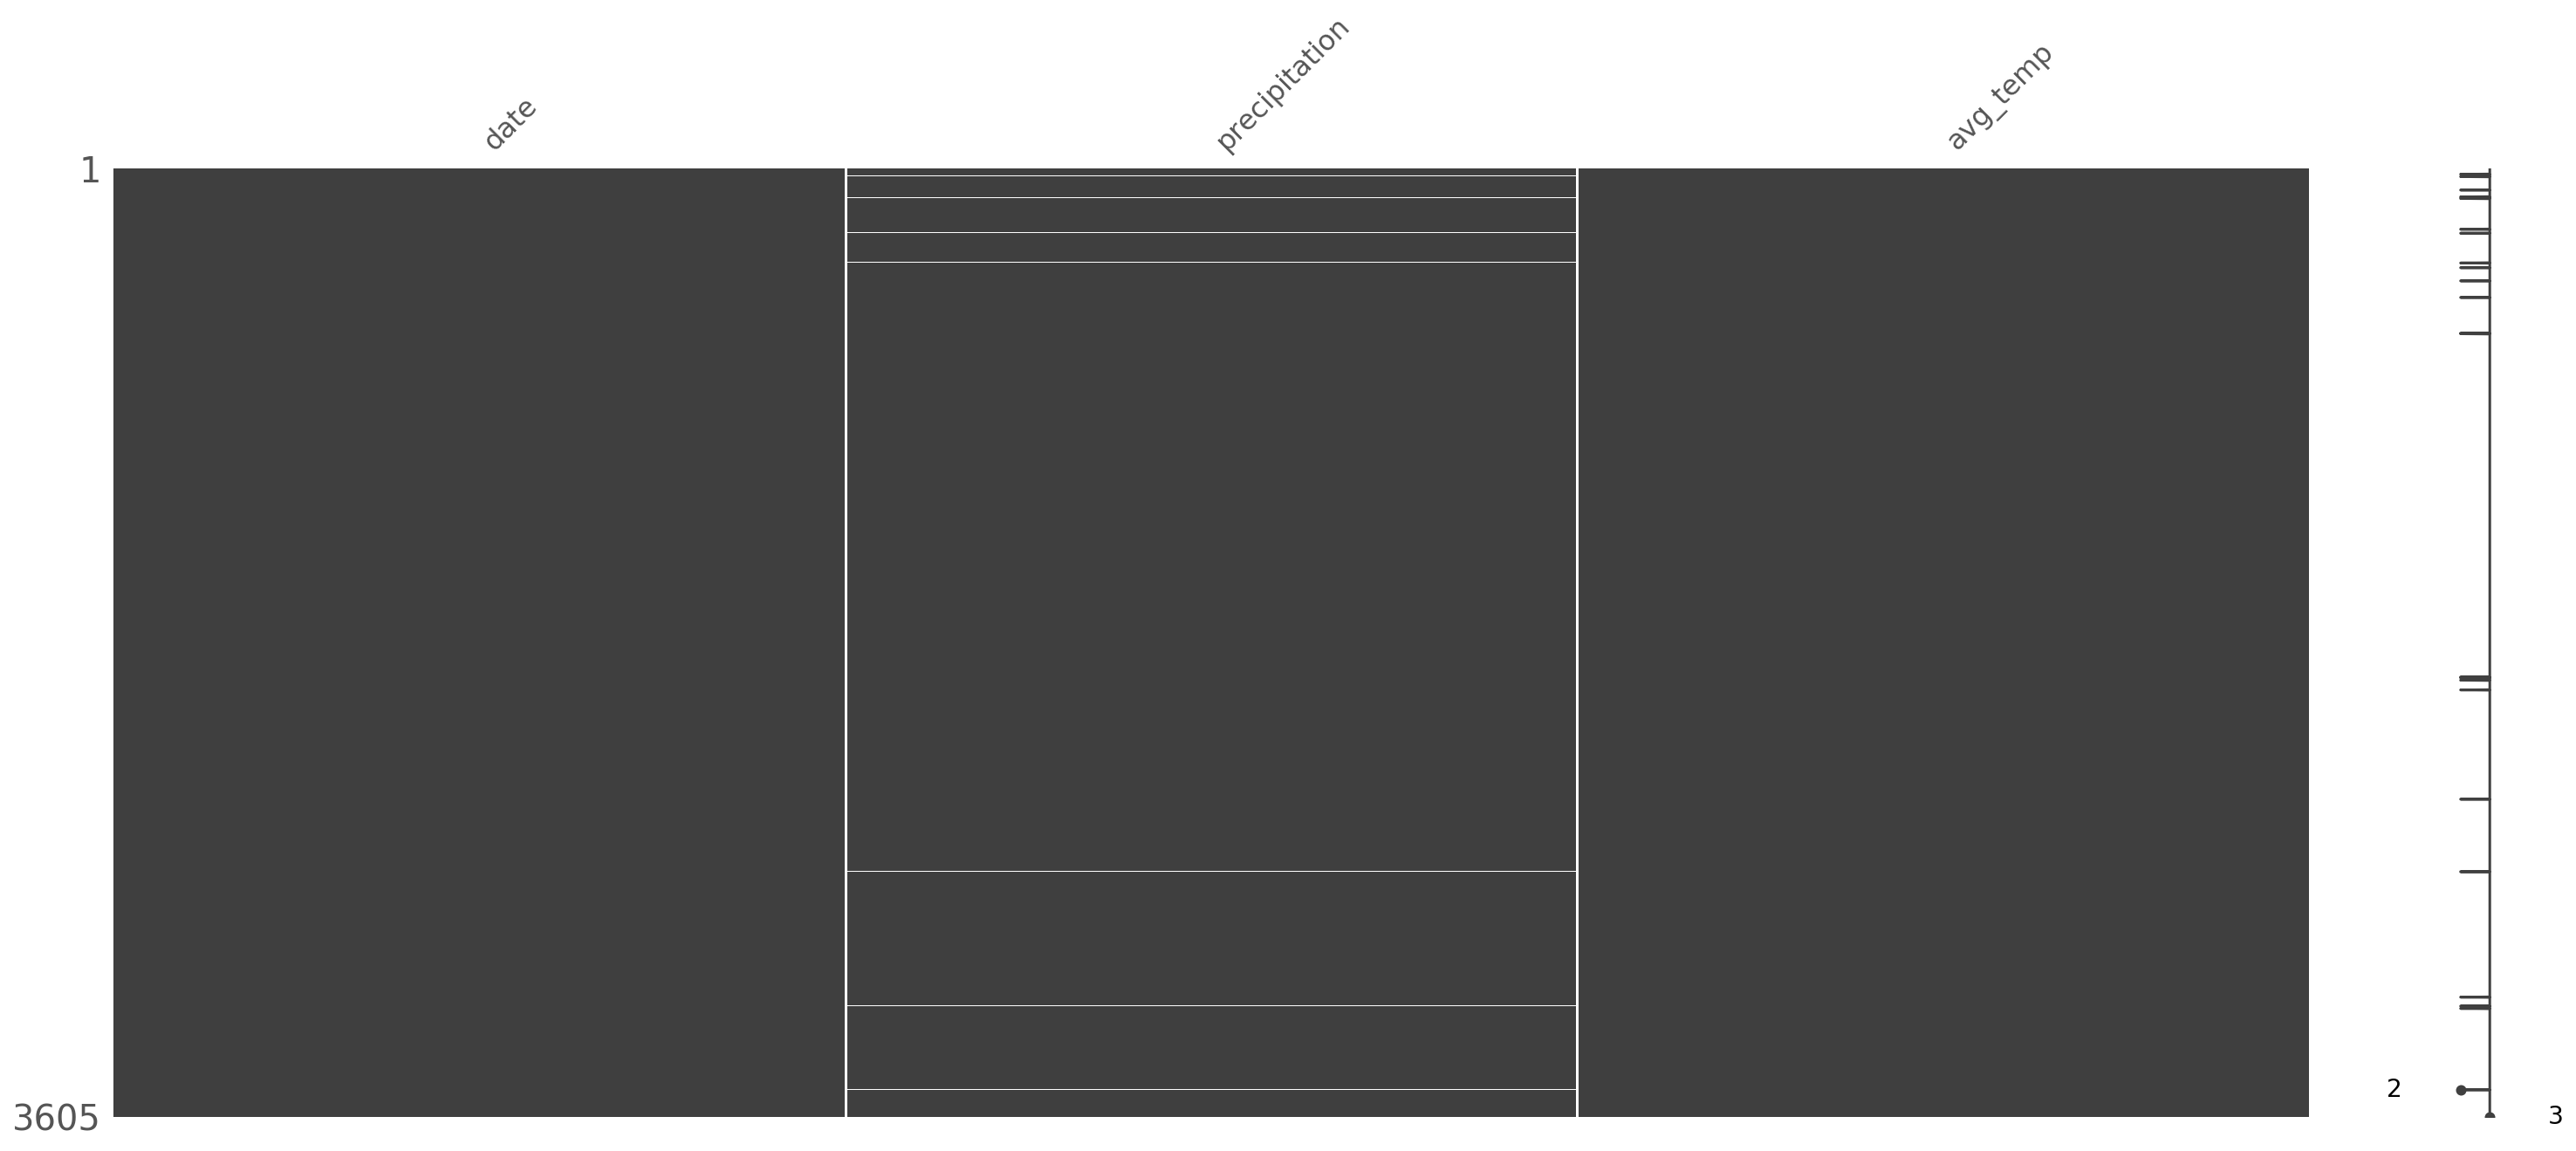

In [58]:
_ = msno.matrix(paris_df)

In [59]:
paris_df['month'] = paris_df.date.dt.month
paris_df['year'] = paris_df.date.dt.year
paris_df['day'] = paris_df.date.dt.day
paris_df['weekdayName'] = paris_df.date.dt.weekday_name
paris_df['weekday'] = paris_df.date.dt.weekday
paris_df['week'] = paris_df.date.dt.week
paris_df['weekend'] = paris_df.date.dt.weekday // 5 == 1

In [60]:
all_month_year_percentage_df = pd.pivot_table(paris_df, values="precipitation",index=["month"], columns=["year"],
                                              aggfunc=lambda x: (x>MIN_PRECIPITATION_MM_DRY).sum()/len(x),
                                              fill_value=0,
                                              margins=True)
all_month_year_percentage_df = all_month_year_percentage_df.set_index([[calendar.month_abbr[i] if isinstance(i, int)
                                                                        else i for i in list(all_month_year_percentage_df.index)]])

Text(0.5, 1.0, 'Percentage of days in the month with rain')

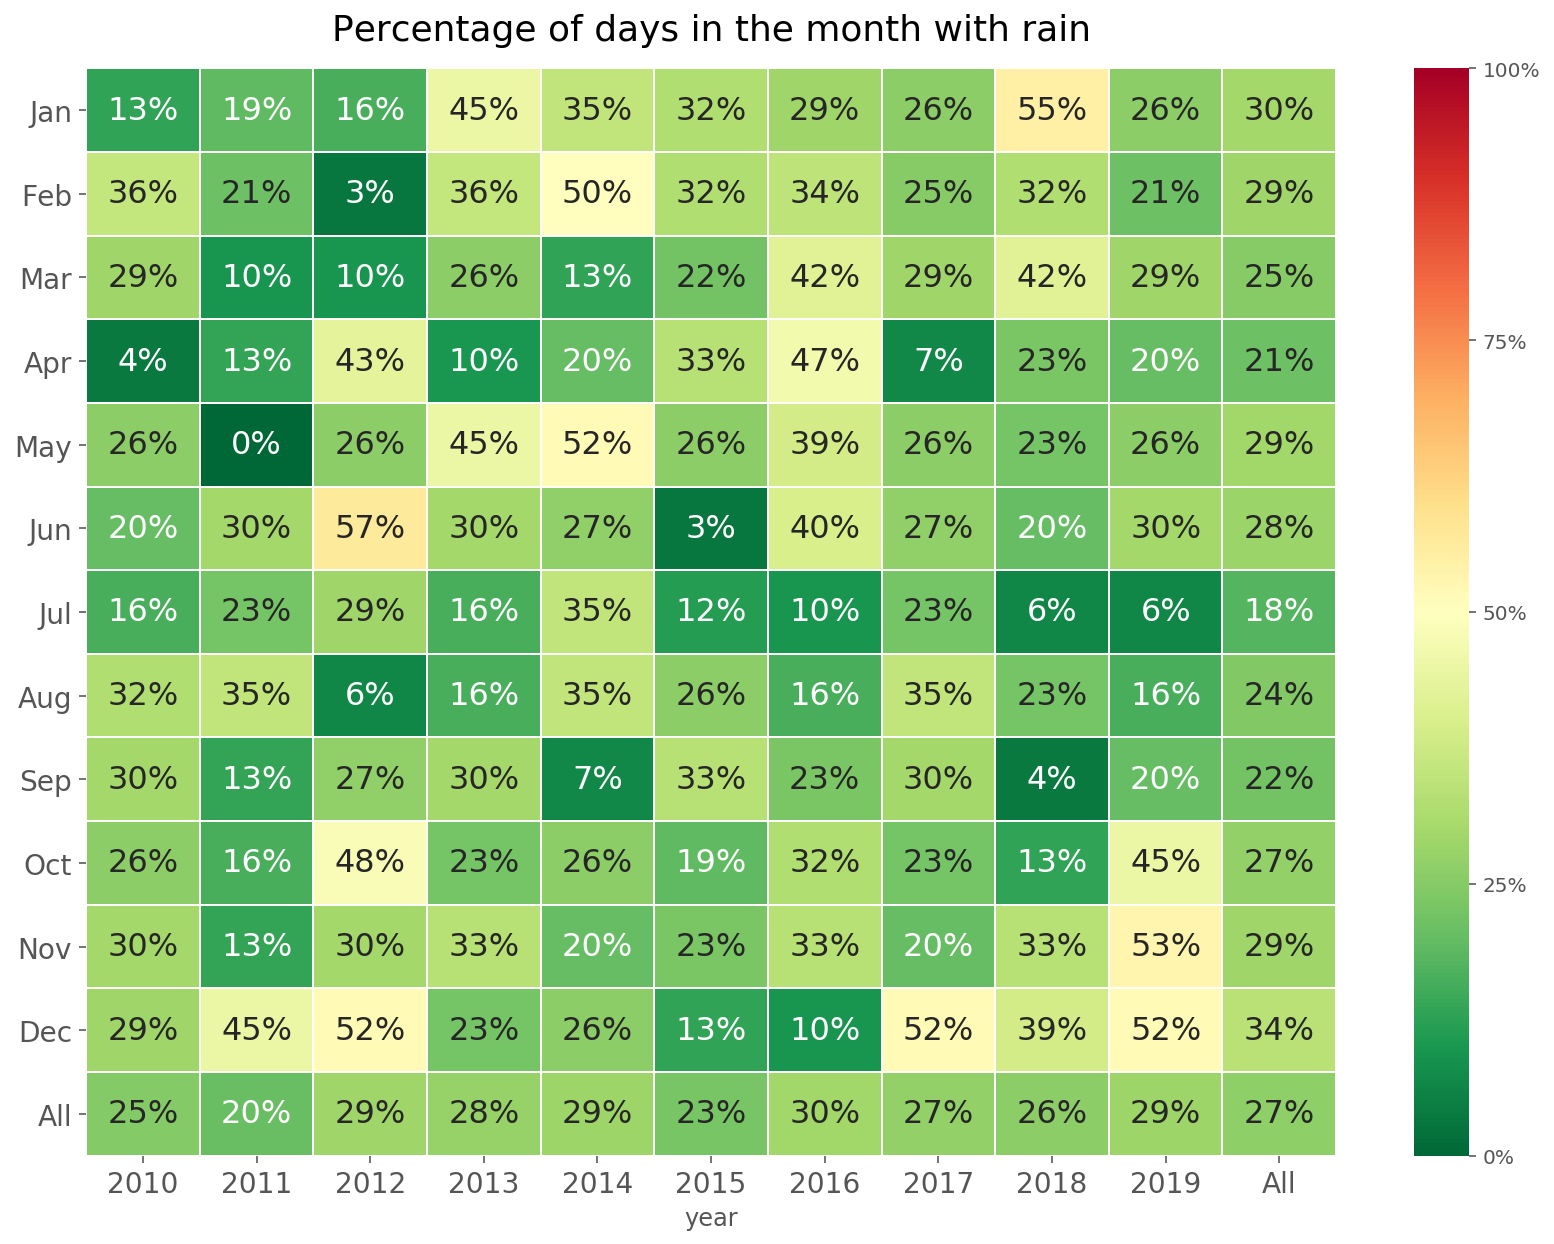

In [61]:
plt.figure(figsize = (14, 10))
ax = sns.heatmap(all_month_year_percentage_df, cmap = 'RdYlGn_r', annot=True, fmt='.0%',
                 vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 16})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50,.75, 1])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
ax.tick_params(rotation = 0)
plt.title('Percentage of days in the month with rain', fontdict={'fontsize':18}, pad=14)

In [62]:
df['location'] = 'London'
paris_df['location'] = 'Paris'
join_df = pd.concat([df, paris_df], ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
ny_df = pd.read_csv('/kaggle/input/newwork1019/NewYorkMeteo2010-2019.csv', 
                               usecols=['DATE', 'PRCP', 'TAVG'], parse_dates=['DATE'])
#df['DATE'] = df['DATE'].astype('datetime64[ns]') # needed if date format is not standard
ny_df.columns = ['date', 'precipitation', 'avg_temp']
ny_df.sample(3)

date  precipitation  avg_temp
2812 2017-09-13           10.2      21.1
188  2010-07-08            0.0       NaN
642  2011-10-05            0.0       NaN

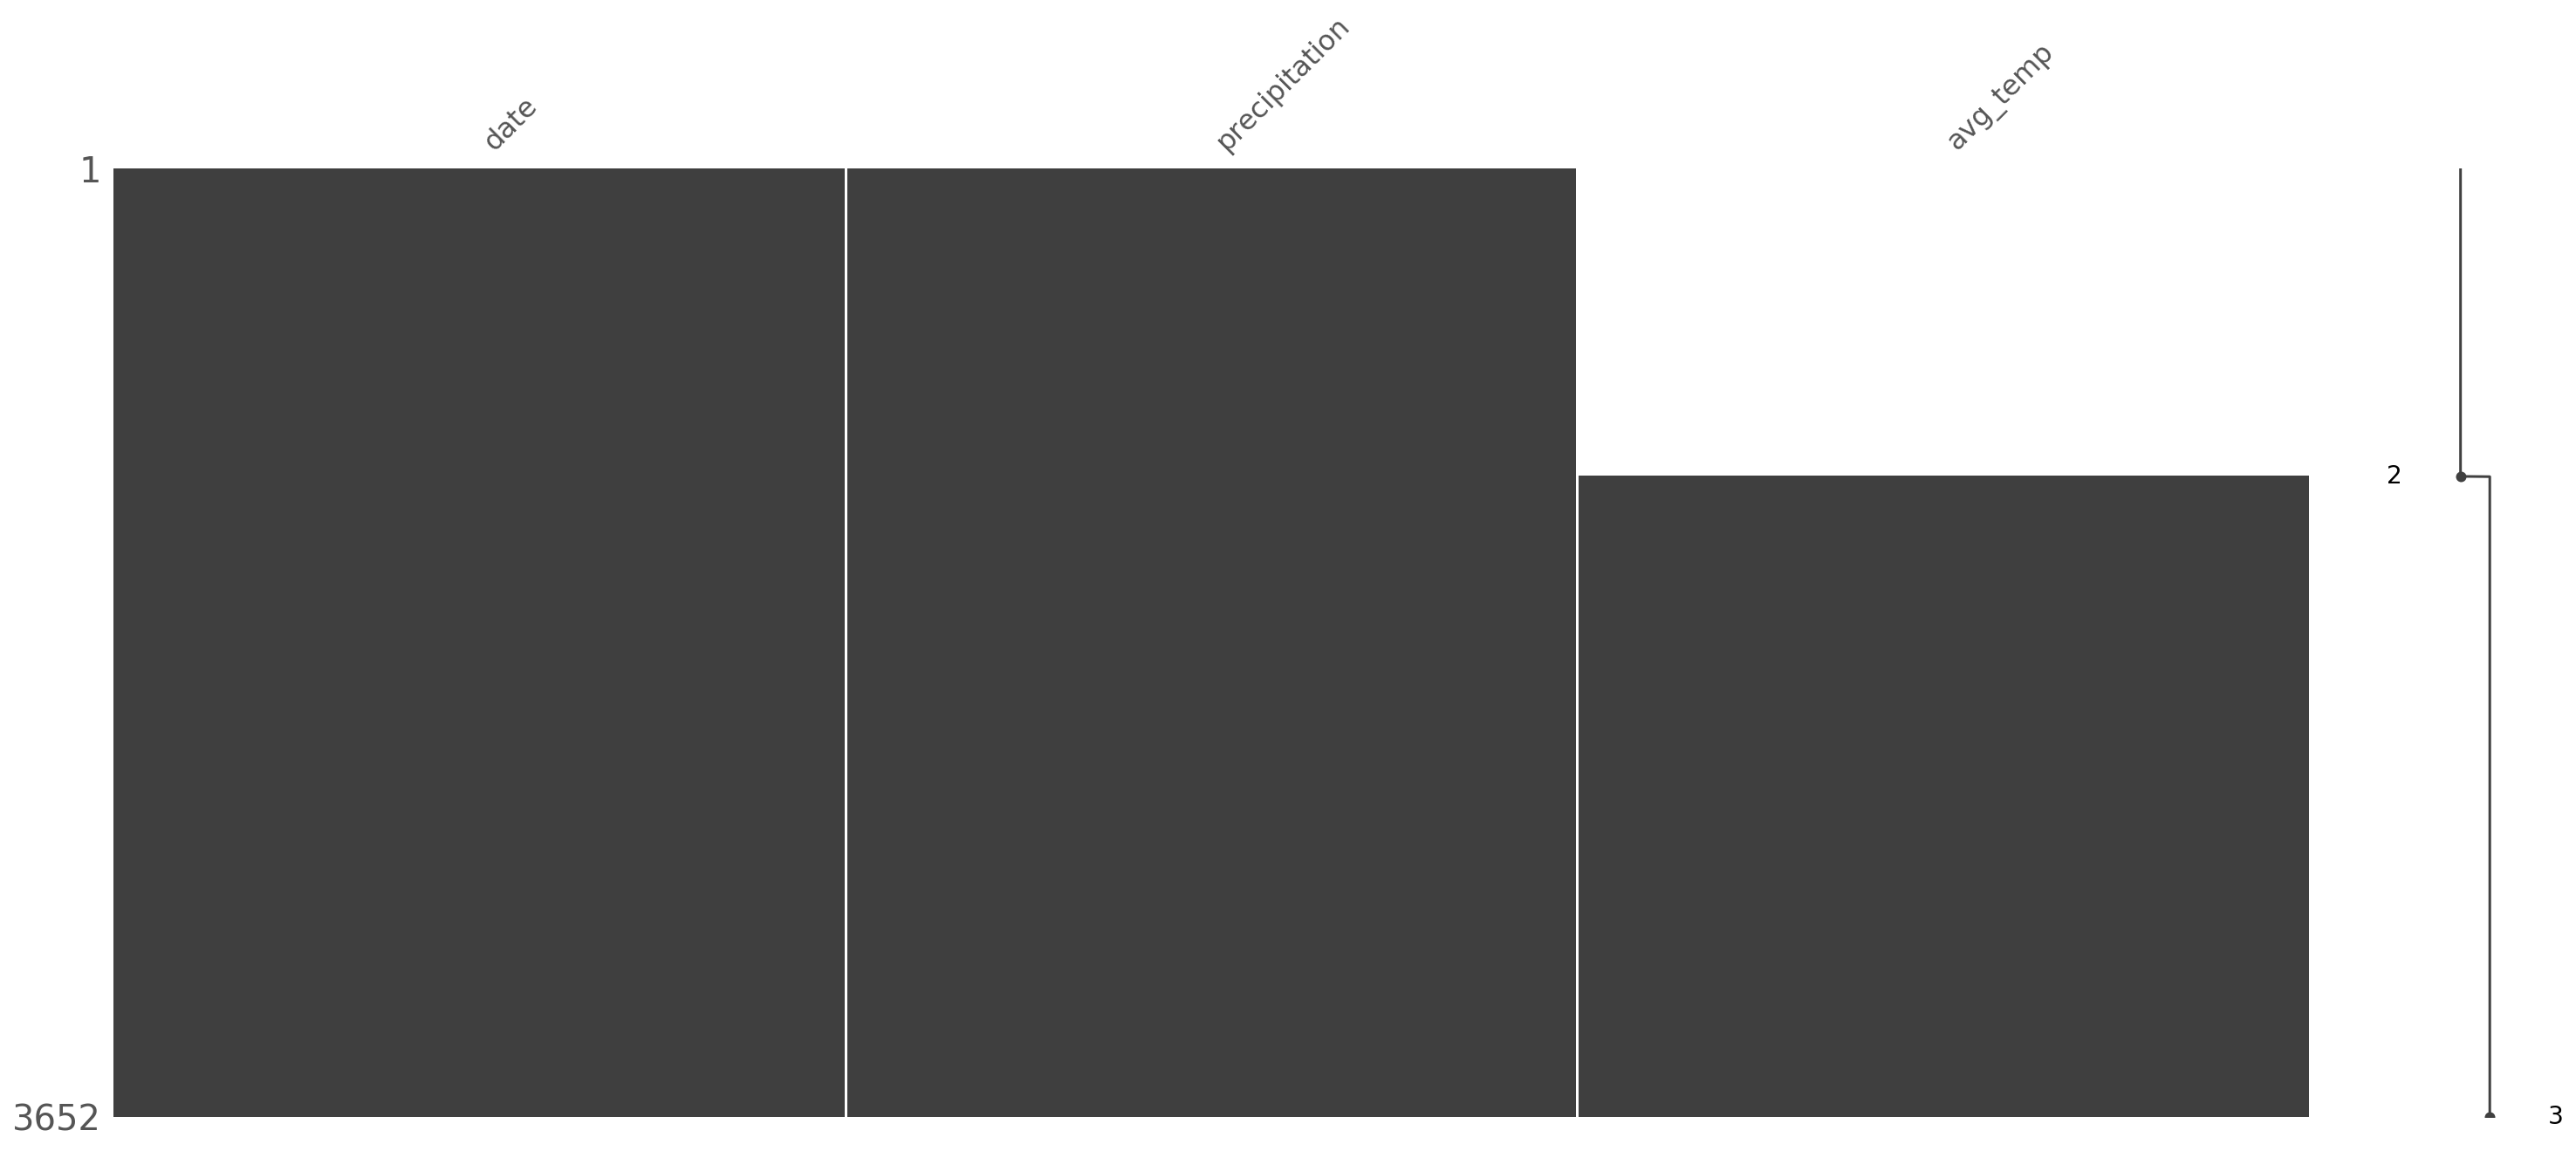

In [64]:
_ = msno.matrix(ny_df)

In [65]:
ny_df['month'] = ny_df.date.dt.month
ny_df['year'] = ny_df.date.dt.year
ny_df['day'] = ny_df.date.dt.day
ny_df['weekdayName'] = ny_df.date.dt.weekday_name
ny_df['weekday'] = ny_df.date.dt.weekday
ny_df['week'] = ny_df.date.dt.week
ny_df['weekend'] = ny_df.date.dt.weekday // 5 == 1

In [66]:
all_month_year_percentage_df = pd.pivot_table(ny_df, values="precipitation",index=["month"], columns=["year"],
                                              aggfunc=lambda x: (x>MIN_PRECIPITATION_MM_DRY).sum()/len(x),
                                              fill_value=0,
                                              margins=True)
all_month_year_percentage_df = all_month_year_percentage_df.set_index([[calendar.month_abbr[i] if isinstance(i, int)
                                                                        else i for i in list(all_month_year_percentage_df.index)]])

Text(0.5, 1.0, 'Percentage of days in the month with rain')

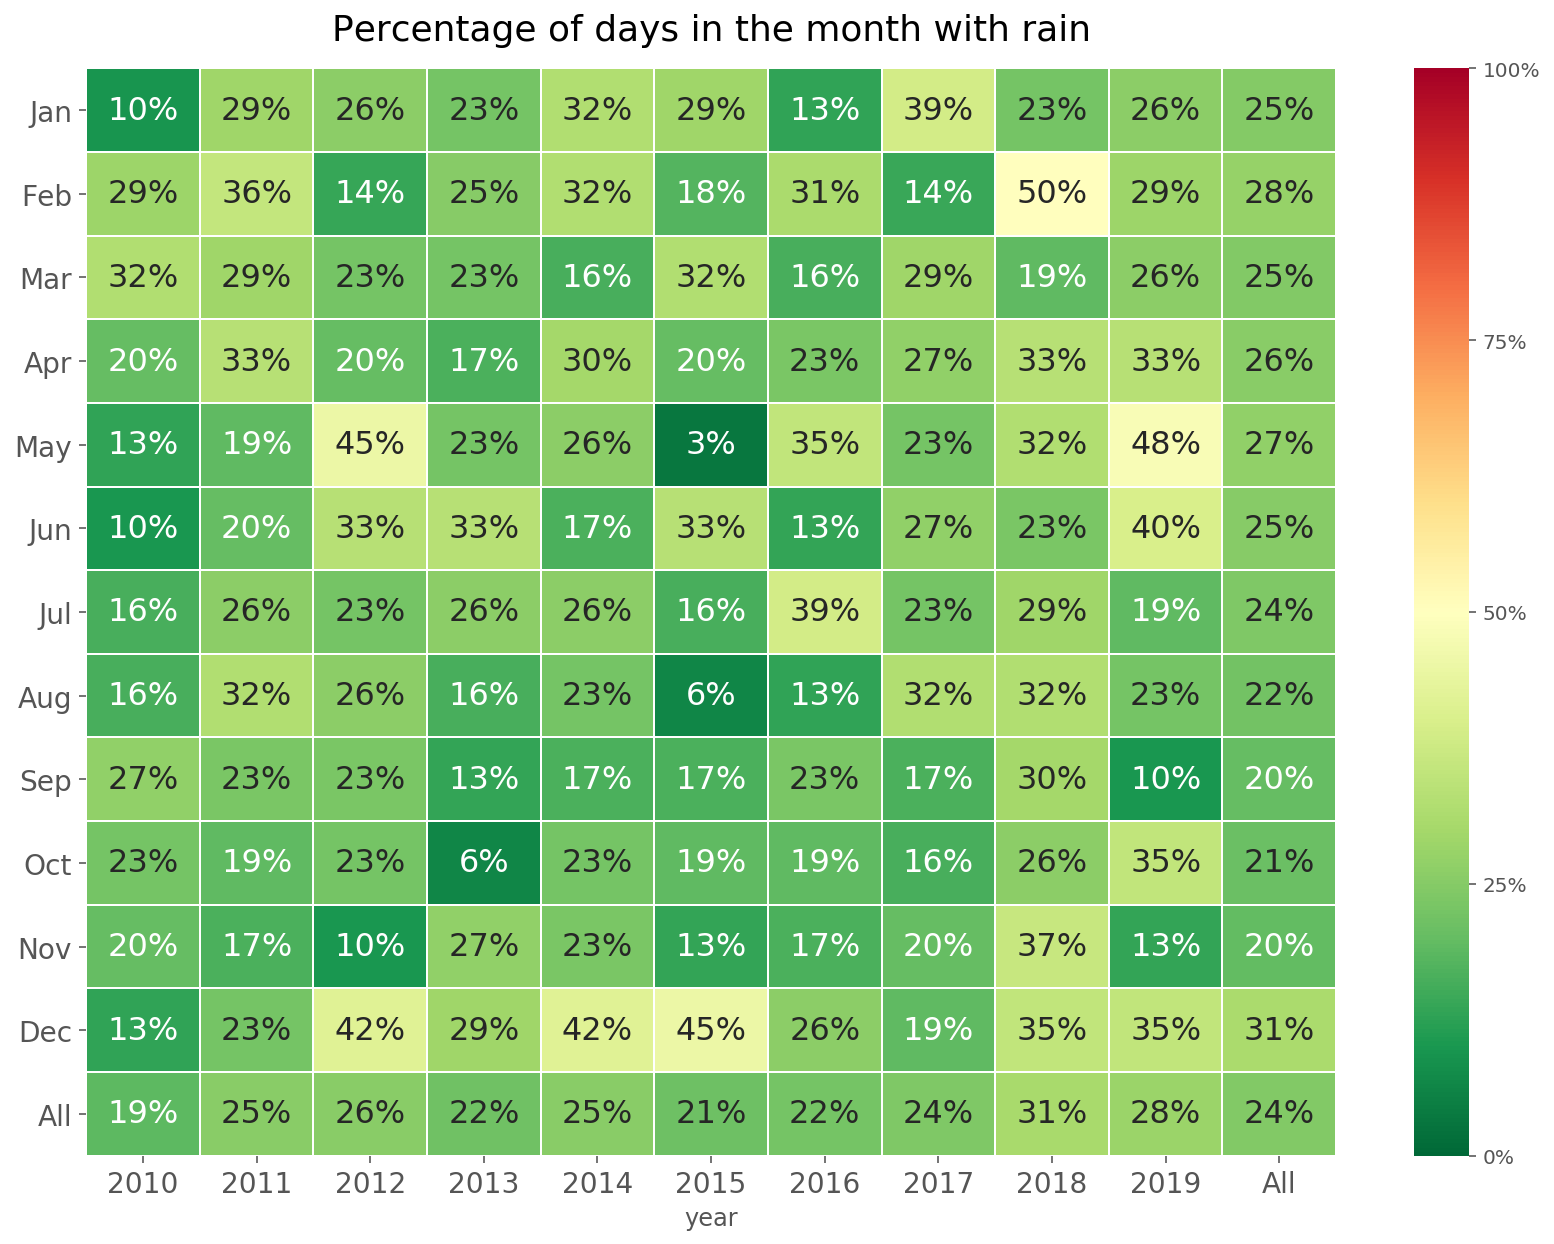

In [67]:
plt.figure(figsize = (14, 10))
ax = sns.heatmap(all_month_year_percentage_df, cmap = 'RdYlGn_r', annot=True, fmt='.0%',
                 vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 16})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50,.75, 1])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
ax.tick_params(rotation = 0)
plt.title('Percentage of days in the month with rain', fontdict={'fontsize':18}, pad=14)

In [68]:
(df['raining'].diff() != 0)[:10]

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8    False
9    False
Name: raining, dtype: bool

In [69]:
df.head(10)

date  precipitation  avg_temp  month  year  day weekdayName  weekday  \
0 2010-01-01            0.0       0.8      1  2010    1      Friday        4   
1 2010-01-02            0.0       1.8      1  2010    2    Saturday        5   
2 2010-01-03            0.0       0.4      1  2010    3      Sunday        6   
3 2010-01-04            0.0      -2.8      1  2010    4      Monday        0   
4 2010-01-05            0.3      -1.3      1  2010    5     Tuesday        1   
5 2010-01-06            1.5      -0.1      1  2010    6   Wednesday        2   
6 2010-01-07            3.0      -2.3      1  2010    7    Thursday        3   
7 2010-01-08            1.0      -1.4      1  2010    8      Friday        4   
8 2010-01-09            0.3      -1.2      1  2010    9    Saturday        5   
9 2010-01-10            0.0       1.4      1  2010   10      Sunday        6   

   week  weekend  raining  value_grp location  
0    53    False        0          1   London  
1    53     True        0          1   London  
2    53     True        0          1   London  
3     1    False        0          1   London  
4     1    False        0          1   London  
5     1    False        1          2   London  
6     1    False        1          2   London  
7     1    False        0          3   London  
8     1     True        0          3   London  
9     1     True        0          3   London

In [70]:
df['raining'].diff()[:100]

0     NaN
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: raining, Length: 100, dtype: float64